<a href="https://colab.research.google.com/github/Zeddling/Hands_On_ML/blob/classification/Hands_On_ML/Classification/exercises/spam_classification/Spam_Classification/SpamClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Spam Classifier
<p>Reference: <a href="https://github.com/ageron/handson-ml2/blob/master/03_classification.ipynb">Classification.ipynb</a></p>

In [ ]:
# Mount google drive folder
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Load dataset
import os
ham_filenames = [name for name in sorted(os.listdir("/content/drive/MyDrive/Datasets/spam_email/easy_ham")) if len(name) > 20]
hard_ham_filenames = [name for name in sorted(os.listdir("/content/drive/MyDrive/Datasets/spam_email/hard_ham")) if len(name) > 20]
spam_filenames = [name for name in sorted(os.listdir("/content/drive/MyDrive/Datasets/spam_email/spam")) if len(name) > 20]

In [ ]:
len(ham_filenames)

2500

In [ ]:
len(spam_filenames)

500

In [ ]:
len(hard_ham_filenames)

250

In [ ]:
# Use python's email module to pass emails
import email
import email.policy

spam_path="/content/drive/MyDrive/Datasets/spam_email/"
def load_emails(filename, directory):
  with open(os.path.join(spam_path, directory, filename), "rb") as f:
    return email.parser.BytesParser(policy=email.policy.default).parse(f)

In [ ]:
hard_ham_emails = [load_emails(filename=name, directory="hard_ham") for name in hard_ham_filenames]
spam_emails = [load_emails(filename=name, directory="spam") for name in spam_filenames]
ham_emails = [load_emails(filename=name, directory="easy_ham") for name in ham_filenames]

In [ ]:
print(hard_ham_emails[0].get_content().strip())

<html>
<head>
        <title>Cable companies cracking down on Wi-Fi</title>
</head>
<body bgcolor="#e5e5e5">
<center>
<a name="top"></a>
<!-- Logo and ad banner -->
<table cellpadding=0 cellspacing=0 border=0 width=612 bgcolor="#ffffff">
	<tr valign=top>
    <td width=442 colspan=4 bgcolor="#e5e5e5">
        <img src="http://home.cnet.com/i/ne/ds/dhed.gif" alt="" width="442" height="63" border="0"><br>
    </td>
    <td width=160 rowspan=2>
		<table cellpadding=0 cellspacing=0 border=0 width=160>
		<tr><td align=center bgcolor="#e5e5e5">
		<img src="http://home.cnet.com/i/ne/ds/ad.gif" alt="" width="107" height="16" border="0"><br></td></tr>
		</table>
<!-- Towerboard -->
	<iframe src="http://www.zdnet.com/include/ads/ifc/RGROUP=2560" scrolling="no" frameborder="0" hspace="0" vspace="0" height="600" width="160" marginheight="0" marginwidth="0">
<script language="JavaScript" src="http://www.zdnet.com/include/ads/js/RGROUP=2560">
</script>
</iframe>
<!-- /Towerboard -->
	<p>
	<!-- search

In [ ]:
print(ham_emails[0].get_content().strip())

Date:        Wed, 21 Aug 2002 10:54:46 -0500
    From:        Chris Garrigues <cwg-dated-1030377287.06fa6d@DeepEddy.Com>
    Message-ID:  <1029945287.4797.TMDA@deepeddy.vircio.com>


  | I can't reproduce this error.

For me it is very repeatable... (like every time, without fail).

This is the debug log of the pick happening ...

18:19:03 Pick_It {exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace} {4852-4852 -sequence mercury}
18:19:03 exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace 4852-4852 -sequence mercury
18:19:04 Ftoc_PickMsgs {{1 hit}}
18:19:04 Marking 1 hits
18:19:04 tkerror: syntax error in expression "int ...

Note, if I run the pick command by hand ...

delta$ pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace  4852-4852 -sequence mercury
1 hit

That's where the "1 hit" comes from (obviously).  The version of nmh I'm
using is ...

delta$ pick -version
pick -- nmh-1.0.4 [compiled on fuchsia.cs.mu.OZ.AU at Sun Mar 17 14:55:56 

In [ ]:
print(ham_emails[6].get_content().strip())

The Scotsman - 22 August 2002

 Playboy wants to go out with a bang 
 
 
 AN AGEING Berlin playboy has come up with an unusual offer to lure women into
 his bed - by promising the last woman he sleeps with an inheritance of 250,000
 (£160,000). 
 
 Rolf Eden, 72, a Berlin disco owner famous for his countless sex partners,
 said he could imagine no better way to die than in the arms of an attractive
 young woman - preferably under 30. 
 
 "I put it all in my last will and testament - the last woman who sleeps with
 me gets all the money," Mr Eden told Bild newspaper. 
 
 "I want to pass away in the most beautiful moment of my life. First a lot of
 fun with a beautiful woman, then wild sex, a final orgasm - and it will all
 end with a heart attack and then Im gone." 
 
 Mr Eden, who is selling his nightclub this year, said applications should be
 sent in quickly because of his age. "It could end very soon," he said.


------------------------ Yahoo! Groups Sponsor ---------------------~

In [ ]:
# Combine hard ham and easy ham
# Shuffle list
import random

ham_emails.extend(hard_ham_emails)
random.shuffle(ham_emails)
len(ham_emails)

2750

In [ ]:
# Get email structure
def get_email_structure(email):
  if isinstance(email, str):
    return email
  payload = email.get_payload()
  if isinstance(payload, list):
    return "multipart({})".format(", ".join([
        get_email_structure(sub_email)
        for sub_email in payload
    ]))
  else:
    return email.get_content_type()

In [ ]:
from collections import Counter

def structures_counter(emails):
  structures = Counter()
  for email in emails:
    structure = get_email_structure(email)
    structures[structure] += 1
  return structures

In [ ]:
structures_counter(ham_emails).most_common()

[('text/plain', 2494),
 ('text/html', 120),
 ('multipart(text/plain, application/pgp-signature)', 66),
 ('multipart(text/plain, text/html)', 46),
 ('multipart(text/plain, text/plain)', 4),
 ('multipart(text/plain)', 3),
 ('multipart(text/html)', 2),
 ('multipart(text/plain, application/x-pkcs7-signature)', 2),
 ('multipart(text/plain, application/octet-stream)', 2),
 ('multipart(text/plain, image/bmp)', 1),
 ('multipart(text/plain, application/x-java-applet)', 1),
 ('multipart(multipart(text/plain, text/html))', 1),
 ('multipart(text/plain, multipart(text/plain))', 1),
 ('multipart(text/plain, multipart(text/plain, text/plain), multipart(multipart(text/plain, application/x-pkcs7-signature)))',
  1),
 ('multipart(text/plain, application/ms-tnef, text/plain)', 1),
 ('multipart(text/plain, multipart(text/plain, text/plain), text/rfc822-headers)',
  1),
 ('multipart(text/plain, image/png, image/png)', 1),
 ('multipart(text/plain, video/mng)', 1),
 ('multipart(text/plain, text/enriched)', 1

In [ ]:
structures_counter(spam_emails).most_common()

[('text/plain', 218),
 ('text/html', 183),
 ('multipart(text/plain, text/html)', 45),
 ('multipart(text/html)', 20),
 ('multipart(text/plain)', 19),
 ('multipart(multipart(text/html))', 5),
 ('multipart(text/plain, image/jpeg)', 3),
 ('multipart(text/html, application/octet-stream)', 2),
 ('multipart(text/plain, application/octet-stream)', 1),
 ('multipart(text/html, text/plain)', 1),
 ('multipart(multipart(text/html), application/octet-stream, image/jpeg)', 1),
 ('multipart(multipart(text/plain, text/html), image/gif)', 1),
 ('multipart/alternative', 1)]

###Notes
Ham emails are mostly plain text while spam is mostly HTML<br>
None of the spam emails are signed with PGP whereas ham emails aren't

In [ ]:
# Check email headers
for header, value in spam_emails[0].items():
  print(header,":",value)

Return-Path : <12a1mailbot1@web.de>
Delivered-To : zzzz@localhost.spamassassin.taint.org
Received : from localhost (localhost [127.0.0.1])	by phobos.labs.spamassassin.taint.org (Postfix) with ESMTP id 136B943C32	for <zzzz@localhost>; Thu, 22 Aug 2002 08:17:21 -0400 (EDT)
Received : from mail.webnote.net [193.120.211.219]	by localhost with POP3 (fetchmail-5.9.0)	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 13:17:21 +0100 (IST)
Received : from dd_it7 ([210.97.77.167])	by webnote.net (8.9.3/8.9.3) with ESMTP id NAA04623	for <zzzz@spamassassin.taint.org>; Thu, 22 Aug 2002 13:09:41 +0100
From : 12a1mailbot1@web.de
Received : from r-smtp.korea.com - 203.122.2.197 by dd_it7  with Microsoft SMTPSVC(5.5.1775.675.6);	 Sat, 24 Aug 2002 09:42:10 +0900
To : dcek1a1@netsgo.com
Subject : Life Insurance - Why Pay More?
Date : Wed, 21 Aug 2002 20:31:57 -1600
MIME-Version : 1.0
Message-ID : <0103c1042001882DD_IT7@dd_it7>
Content-Type : text/html; charset="iso-8859-1"
Content-Transfer-Encoding : qu

In [ ]:
spam_emails[0]["Subject"]

'Life Insurance - Why Pay More?'

In [ ]:
# Split dataset into train and test
import numpy as np
from sklearn.model_selection import train_test_split

X = np.array(ham_emails + spam_emails, dtype=object)
y = np.array([0] * len(ham_emails) + [1] * len(spam_emails))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Preprocessing

1. Convert HTML to plain text

In [ ]:
# Drop head tag
# Convert <a> to HYPERLINK
# Get rid of all HTML tags
# Replace multiple newines with single newlines
# Unescape html entities
import re
from html import unescape

def html_to_plain_text(html):
  text = re.sub('<head.*?>.*?</head>', '', html, flags=re.M | re.S | re.I)
  text = re.sub('<a\s.*?>', ' HYPERLINK ', text, flags=re.M | re.S | re.I)
  text = re.sub('<.*?>', '', text, flags=re.M | re.S)
  text = re.sub(r'(\s*\n)+', '\n', text, flags=re.M | re.S)
  return unescape(text)

In [ ]:
# Test to plain text
html_spam_emails = [email for email in X_train[y_train==1] if get_email_structure(email) == "text/html"]
sample_html_spam = html_spam_emails[0]
print(sample_html_spam.get_content().strip()[:1000], "...")

<HTML><HEAD><TITLE></TITLE><META http-equiv="Content-Type" content="text/html; charset=windows-1252"><STYLE>A:link {TEX-DECORATION: none}A:active {TEXT-DECORATION: none}A:visited {TEXT-DECORATION: none}A:hover {COLOR: #0033ff; TEXT-DECORATION: underline}</STYLE><META content="MSHTML 6.00.2713.1100" name="GENERATOR"></HEAD>
<BODY text="#000000" vLink="#0033ff" link="#0033ff" bgColor="#CCCC99"><TABLE borderColor="#660000" cellSpacing="0" cellPadding="0" border="0" width="100%"><TR><TD bgColor="#CCCC99" valign="top" colspan="2" height="27">
<font size="6" face="Arial, Helvetica, sans-serif" color="#660000">
<b>OTC</b></font></TD></TR><TR><TD height="2" bgcolor="#6a694f">
<font size="5" face="Times New Roman, Times, serif" color="#FFFFFF">
<b>&nbsp;Newsletter</b></font></TD><TD height="2" bgcolor="#6a694f"><div align="right"><font color="#FFFFFF">
<b>Discover Tomorrow's Winners&nbsp;</b></font></div></TD></TR><TR><TD height="25" colspan="2" bgcolor="#CCCC99"><table width="100%" border="0" 

In [ ]:
print(html_to_plain_text(sample_html_spam.get_content())[:1000], "...")


OTC
 Newsletter
Discover Tomorrow's Winners 
For Immediate Release
Cal-Bay (Stock Symbol: CBYI)
Watch for analyst "Strong Buy Recommendations" and several advisory newsletters picking CBYI.  CBYI has filed to be traded on the OTCBB, share prices historically INCREASE when companies get listed on this larger trading exchange. CBYI is trading around 25 cents and should skyrocket to $2.66 - $3.25 a share in the near future.
Put CBYI on your watch list, acquire a position TODAY.
REASONS TO INVEST IN CBYI
A profitable company and is on track to beat ALL earnings estimates!
One of the FASTEST growing distributors in environmental & safety equipment instruments.
Excellent management team, several EXCLUSIVE contracts.  IMPRESSIVE client list including the U.S. Air Force, Anheuser-Busch, Chevron Refining and Mitsubishi Heavy Industries, GE-Energy & Environmental Research.
RAPIDLY GROWING INDUSTRY
Industry revenues exceed $900 million, estimates indicate that there could be as much as $25 billi

In [ ]:
# Convert every email to plain text
def email_to_text(email):
  html = None
  for part in email.walk():
    ctype = part.get_content_type()
    if not ctype in ("text/plain", "text/html"):
      continue
    try:
      content = part.get_content()
    except: # in the event of encoding issues
      content = str(part.get_payload())
    if ctype == "text/plain":
      return content
    else:
      html = content
  if html:
    return html_to_plain_text(html)

In [ ]:
print(email_to_text(sample_html_spam))


OTC
 Newsletter
Discover Tomorrow's Winners 
For Immediate Release
Cal-Bay (Stock Symbol: CBYI)
Watch for analyst "Strong Buy Recommendations" and several advisory newsletters picking CBYI.  CBYI has filed to be traded on the OTCBB, share prices historically INCREASE when companies get listed on this larger trading exchange. CBYI is trading around 25 cents and should skyrocket to $2.66 - $3.25 a share in the near future.
Put CBYI on your watch list, acquire a position TODAY.
REASONS TO INVEST IN CBYI
A profitable company and is on track to beat ALL earnings estimates!
One of the FASTEST growing distributors in environmental & safety equipment instruments.
Excellent management team, several EXCLUSIVE contracts.  IMPRESSIVE client list including the U.S. Air Force, Anheuser-Busch, Chevron Refining and Mitsubishi Heavy Industries, GE-Energy & Environmental Research.
RAPIDLY GROWING INDUSTRY
Industry revenues exceed $900 million, estimates indicate that there could be as much as $25 billi

Stemming - Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words(lemma)

In [ ]:
!pip install nltk

In [ ]:
try:
  import nltk

  stemmer = nltk.PorterStemmer()
  for word in ("Computations", "Computation", "Computing", "Computed", "Compute", "Compulsive"):
    print(word, "=>", stemmer.stem(word))
except ImportError:
  print("Error: stemming requires the NLTK module.")
  stemmer = None

Computations => comput
Computation => comput
Computing => comput
Computed => comput
Compute => comput
Compulsive => compuls


In [ ]:
!pip install urlextract

In [ ]:
try:
    import google.colab
    !pip install -q -U urlextract
except ImportError:
    pass # not running on Colab

In [ ]:
try:
    import urlextract # may require an Internet connection to download root domain names
    
    url_extractor = urlextract.URLExtract()
    print(url_extractor.find_urls("Will it detect github.com and https://youtu.be/7Pq-S557XQU?t=3m32s"))
except ImportError:
    print("Error: replacing URLs requires the urlextract module.")
    url_extractor = None

['github.com', 'https://youtu.be/7Pq-S557XQU?t=3m32s']


In [ ]:
# Transformer to convert email to text

from sklearn.base import BaseEstimator, TransformerMixin

class EmailToWordCounterTransformer(BaseEstimator, TransformerMixin):
  def __init__(self, strip_headers=True, lower_case=True, remove_punctuation=True,
               replace_urls=True, replace_numbers=True, stemming=True):
    self.strip_headers = strip_headers
    self.lower_case = lower_case
    self.remove_punctuation = remove_punctuation
    self.replace_urls = replace_urls
    self.replace_numbers = replace_numbers
    self.stemming = stemming
  
  def fit(self, X, y=None):
    return self

  def transform(self, X, y=None):
    X_transformed = []
    for email in X:
      text = email_to_text(email) or ""
      if self.lower_case:
        text = text.lower()
      if self.replace_urls and url_extractor is not None:
        urls = list(set(url_extractor.find_urls(text)))
        urls.sort(key=lambda url: len(url), reverse=True)
        for url in urls:
          text = text.replace(url, "URL ")
      if self.replace_numbers:
        text = re.sub(r'\d+(?:\.\d*)?(?:[eE][+-]?\d+)?', 'NUMBER', text)
      if self.remove_punctuation:
        text = re.sub(r'\W+', ' ', text, flags=re.M)
      word_counts = Counter(text.split())
      if self.stemming and stemmer is not None:
        stemmed_word_counts = Counter()
        for word, count in word_counts.items():
          stemmed_words = stemmer.stem(word)
          stemmed_word_counts[stemmed_words] += count
        word_counts = stemmed_word_counts
      X_transformed.append(word_counts)
    return np.array(X_transformed)

In [ ]:
X_few = X_train[:3]
X_few_wordcounts = EmailToWordCounterTransformer().fit_transform(X_few)
X_few_wordcounts

array([Counter({'number': 19, 'i': 7, 'that': 7, 'a': 6, 'openssh': 6, 't': 6, 'packag': 5, 'of': 5, 'it': 5, 'with': 4, 'matthia': 3, 'do': 3, 'red': 3, 'hat': 3, 'and': 3, 's': 3, 'rpm': 3, 'the': 3, 'to': 3, 'ssh': 3, 'list': 3, 'wrote': 2, 'at': 2, 'saou': 2, 'all': 2, 'don': 2, 'version': 2, 'you': 2, 'have': 2, 'is': 2, 'offici': 2, 'problem': 2, 'from': 2, 'rh': 2, 'upgrad': 2, 'doesn': 2, 'downgrad': 2, 'as': 2, 'like': 2, 'well': 2, 'but': 2, 'connect': 2, 'work': 2, 'onc': 1, 'upon': 1, 'time': 1, 'peter': 1, 'on': 1, 'wed': 1, 'feb': 1, 'numberpm': 1, 'strang': 1, 'my': 1, 'explicitli': 1, 'requir': 1, 'openssl': 1, 'what': 1, 'an': 1, 'suppos': 1, 'isn': 1, 'use': 1, 'will': 1, 'solv': 1, 'your': 1, 'numberpnumb': 1, 'think': 1, 'directli': 1, 'site': 1, 'ship': 1, 'explain': 1, 'probabl': 1, 'should': 1, 'versoin': 1, 'provid': 1, 'except': 1, 'can': 1, 'physic': 1, 'access': 1, 'box': 1, 'over': 1, 'sound': 1, 'bright': 1, 'idea': 1, 've': 1, 'seen': 1, 'few': 1, 'realli'

In [ ]:
# Task: convert word counts into vectors
# fit() builds vocabulary (an ordered list of the most common words)
# transform() converts word counts to vectors; outputs a sparse matrix
from scipy.sparse import csr_matrix

class WordCounterToVectorTransformer(BaseEstimator, TransformerMixin):
  def __init__(self, vocabulary_size=1000):
    self.vocabulary_size = vocabulary_size
  
  def fit(self, X, y=None):
    total_count = Counter()
    for word_count in X:
      for word, count in word_count.items():
        total_count[word] += min(count, 10)
    most_common = total_count.most_common()[:self.vocabulary_size]
    self.vocabulary_ = {word: index + 1 for index, (word, count) in enumerate(most_common)}
    return self
  
  def transform(self, X, y=None):
    rows=[]
    cols=[]
    data=[]
    for row, word_count in enumerate(X):
      for word, count in word_count.items():
        rows.append(row)
        cols.append(self.vocabulary_.get(word, 0))
        data.append(count)
    return csr_matrix((data, (rows, cols)), shape=(len(X), self.vocabulary_size+1))

In [ ]:
# Test transformer
vocab_transformer = WordCounterToVectorTransformer(vocabulary_size=10)
X_few_vectors = vocab_transformer.fit_transform(X_few_wordcounts)
X_few_vectors

<3x11 sparse matrix of type '<class 'numpy.longlong'>'
	with 26 stored elements in Compressed Sparse Row format>

In [ ]:
X_few_vectors.toarray()

array([[167,   3,   7,  19,   5,   6,   7,   4,   2,   3,   6],
       [118,  12,   0,   0,   4,   3,   1,   3,   5,   2,   0],
       [ 28,   2,   6,   1,   1,   0,   0,   1,   0,   2,   0]],
      dtype=int64)

Understanding sparse matrix<br>
1. The first column represents number of words not in the vocabulary.
2. Subsequent columns represents the count of the words in the vocabulary respectively present in the row

In [ ]:
vocab_transformer.vocabulary_

{'a': 5,
 'i': 2,
 'is': 8,
 'number': 3,
 'of': 4,
 'openssh': 10,
 'that': 6,
 'the': 1,
 'to': 9,
 'with': 7}

In [ ]:
from sklearn.pipeline import Pipeline

preprocess_pipeline = Pipeline([
                              ("email_to_wordcount", EmailToWordCounterTransformer()),
                              ("wordcount_to_vector", WordCounterToVectorTransformer()),
])

X_train_transformed = preprocess_pipeline.fit_transform(X_train)

# Train Models
### 1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_clf = LogisticRegression(solver="lbfgs", max_iter=1000, random_state=42)
score = cross_val_score(log_clf, X_train_transformed, y_train, cv=3, verbose=3)
score.mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.979, total=   0.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] .................................... , score=0.971, total=   0.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


[CV] .................................... , score=0.971, total=   0.8s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.2s finished


0.9738451102036612

In [ ]:
# Precision/Recall
from sklearn.metrics import precision_score, recall_score, f1_score

X_test_transformed = preprocess_pipeline.transform(X_test)

log_clf = LogisticRegression(solver="lbfgs", max_iter=1000, random_state=42)
log_clf.fit(X_train_transformed, y_train)

y_pred_log = log_clf.predict(X_test_transformed)
print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_pred_log)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_pred_log)))
print("f1 score: {:.2f}%".format(100 * f1_score(y_test, y_pred_log)))

Precision: 97.09%
Recall: 96.15%
f1 score: 96.62%


In [ ]:
from sklearn.model_selection import GridSearchCV

log_param_grid = [{
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-4, 4, 20),
    'fit_intercept': [True, False],
}]


grid_search_log = GridSearchCV(log_clf, log_param_grid, cv=5, verbose=3)
grid_search_log.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV] C=0.0001, fit_intercept=True, penalty=l1 ........................
[CV]  C=0.0001, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=0.0001, fit_intercept=True, penalty=l1 ........................
[CV]  C=0.0001, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=0.0001, fit_intercept=True, penalty=l1 ........................
[CV]  C=0.0001, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=0.0001, fit_intercept=True, penalty=l1 ........................
[CV]  C=0.0001, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=0.0001, fit_intercept=True, penalty=l1 ........................
[CV]  C=0.0001, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=0.0001, fit_intercept=True, penalty=l2 ........................
[CV]  C=0.0001, fit_intercept=True, penalty=l2, score=0.856, total=   0.1s
[CV] C=0.0001, fit_intercept=True, penalty=l2 ........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.0001, fit_intercept=True, penalty=l2, score=0.854, total=   0.1s
[CV] C=0.0001, fit_intercept=True, penalty=l2 ........................
[CV]  C=0.0001, fit_intercept=True, penalty=l2, score=0.852, total=   0.2s
[CV] C=0.0001, fit_intercept=True, penalty=l2 ........................
[CV]  C=0.0001, fit_intercept=True, penalty=l2, score=0.860, total=   0.1s
[CV] C=0.0001, fit_intercept=True, penalty=l2 ........................
[CV]  C=0.0001, fit_intercept=True, penalty=l2, score=0.862, total=   0.2s
[CV] C=0.0001, fit_intercept=True, penalty=elasticnet ................
[CV]  C=0.0001, fit_intercept=True, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.0001, fit_intercept=True, penalty=elasticnet ................
[CV]  C=0.0001, fit_intercept=True, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.0001, fit_intercept=True, penalty=elasticnet ................
[CV]  C=0.0001, fit_intercept=True, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.0001, fit_intercept=Tr

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.0001, fit_intercept=True, penalty=none, score=0.977, total=   0.3s
[CV] C=0.0001, fit_intercept=True, penalty=none ......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.0001, fit_intercept=True, penalty=none, score=0.965, total=   0.2s
[CV] C=0.0001, fit_intercept=True, penalty=none ......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.0001, fit_intercept=True, penalty=none, score=0.973, total=   0.2s
[CV] C=0.0001, fit_intercept=True, penalty=none ......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.0001, fit_intercept=True, penalty=none, score=0.981, total=   0.3s
[CV] C=0.0001, fit_intercept=True, penalty=none ......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.0001, fit_intercept=True, penalty=none, score=0.969, total=   0.3s
[CV] C=0.0001, fit_intercept=False, penalty=l1 .......................
[CV]  C=0.0001, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=0.0001, fit_intercept=False, penalty=l1 .......................
[CV]  C=0.0001, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=0.0001, fit_intercept=False, penalty=l1 .......................
[CV]  C=0.0001, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=0.0001, fit_intercept=False, penalty=l1 .......................
[CV]  C=0.0001, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=0.0001, fit_intercept=False, penalty=l1 .......................
[CV]  C=0.0001, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=0.0001, fit_intercept=False, penalty=l2 .......................
[CV]  C=0.0001, fit_intercept=False, penalty=l2, score=0.913, total=   0.1s
[CV] C=0.0001, fit_intercept=False, penalty=l2 ....

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.0001, fit_intercept=False, penalty=l2, score=0.896, total=   0.1s
[CV] C=0.0001, fit_intercept=False, penalty=l2 .......................
[CV]  C=0.0001, fit_intercept=False, penalty=l2, score=0.902, total=   0.1s
[CV] C=0.0001, fit_intercept=False, penalty=l2 .......................
[CV]  C=0.0001, fit_intercept=False, penalty=l2, score=0.910, total=   0.1s
[CV] C=0.0001, fit_intercept=False, penalty=elasticnet ...............
[CV]  C=0.0001, fit_intercept=False, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.0001, fit_intercept=False, penalty=elasticnet ...............
[CV]  C=0.0001, fit_intercept=False, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.0001, fit_intercept=False, penalty=elasticnet ...............
[CV]  C=0.0001, fit_intercept=False, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.0001, fit_intercept=False, penalty=elasticnet ...............
[CV]  C=0.0001, fit_intercept=False, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.0001, fit

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.0001, fit_intercept=False, penalty=none, score=0.977, total=   0.3s
[CV] C=0.0001, fit_intercept=False, penalty=none .....................
[CV]  C=0.0001, fit_intercept=False, penalty=none, score=0.962, total=   0.2s
[CV] C=0.0001, fit_intercept=False, penalty=none .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.0001, fit_intercept=False, penalty=none, score=0.979, total=   0.3s
[CV] C=0.0001, fit_intercept=False, penalty=none .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.0001, fit_intercept=False, penalty=none, score=0.977, total=   0.3s
[CV] C=0.0001, fit_intercept=False, penalty=none .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.0001, fit_intercept=False, penalty=none, score=0.971, total=   0.3s
[CV] C=0.00026366508987303583, fit_intercept=True, penalty=l1 ........
[CV]  C=0.00026366508987303583, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=0.00026366508987303583, fit_intercept=True, penalty=l1 ........
[CV]  C=0.00026366508987303583, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=0.00026366508987303583, fit_intercept=True, penalty=l1 ........
[CV]  C=0.00026366508987303583, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=0.00026366508987303583, fit_intercept=True, penalty=l1 ........
[CV]  C=0.00026366508987303583, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=0.00026366508987303583, fit_intercept=True, penalty=l1 ........
[CV]  C=0.00026366508987303583, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=0.00026366508987303583, fit_intercept=True, penalty=l2 ........
[CV]  C=0.00026366508987303583, fit_intercept=True,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.00026366508987303583, fit_intercept=True, penalty=l2, score=0.871, total=   0.1s
[CV] C=0.00026366508987303583, fit_intercept=True, penalty=l2 ........
[CV]  C=0.00026366508987303583, fit_intercept=True, penalty=l2, score=0.865, total=   0.2s
[CV] C=0.00026366508987303583, fit_intercept=True, penalty=l2 ........
[CV]  C=0.00026366508987303583, fit_intercept=True, penalty=l2, score=0.881, total=   0.2s
[CV] C=0.00026366508987303583, fit_intercept=True, penalty=l2 ........
[CV]  C=0.00026366508987303583, fit_intercept=True, penalty=l2, score=0.890, total=   0.3s
[CV] C=0.00026366508987303583, fit_intercept=True, penalty=elasticnet 
[CV]  C=0.00026366508987303583, fit_intercept=True, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.00026366508987303583, fit_intercept=True, penalty=elasticnet 
[CV]  C=0.00026366508987303583, fit_intercept=True, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.00026366508987303583, fit_intercept=True, penalty=elasticnet 
[CV]  C=0.000263

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.00026366508987303583, fit_intercept=True, penalty=none, score=0.977, total=   0.3s
[CV] C=0.00026366508987303583, fit_intercept=True, penalty=none ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.00026366508987303583, fit_intercept=True, penalty=none, score=0.965, total=   0.2s
[CV] C=0.00026366508987303583, fit_intercept=True, penalty=none ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.00026366508987303583, fit_intercept=True, penalty=none, score=0.973, total=   0.2s
[CV] C=0.00026366508987303583, fit_intercept=True, penalty=none ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.00026366508987303583, fit_intercept=True, penalty=none, score=0.981, total=   0.3s
[CV] C=0.00026366508987303583, fit_intercept=True, penalty=none ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.00026366508987303583, fit_intercept=True, penalty=none, score=0.969, total=   0.3s
[CV] C=0.00026366508987303583, fit_intercept=False, penalty=l1 .......
[CV]  C=0.00026366508987303583, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=0.00026366508987303583, fit_intercept=False, penalty=l1 .......
[CV]  C=0.00026366508987303583, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=0.00026366508987303583, fit_intercept=False, penalty=l1 .......
[CV]  C=0.00026366508987303583, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=0.00026366508987303583, fit_intercept=False, penalty=l1 .......
[CV]  C=0.00026366508987303583, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=0.00026366508987303583, fit_intercept=False, penalty=l1 .......
[CV]  C=0.00026366508987303583, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=0.00026366508987303583, fit_intercept=False, penalty=l2 .......
[CV]  C=0.00026366508987303583,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.00026366508987303583, fit_intercept=False, penalty=l2, score=0.919, total=   0.1s
[CV] C=0.00026366508987303583, fit_intercept=False, penalty=l2 .......
[CV]  C=0.00026366508987303583, fit_intercept=False, penalty=l2, score=0.919, total=   0.1s
[CV] C=0.00026366508987303583, fit_intercept=False, penalty=l2 .......
[CV]  C=0.00026366508987303583, fit_intercept=False, penalty=l2, score=0.927, total=   0.1s
[CV] C=0.00026366508987303583, fit_intercept=False, penalty=elasticnet 
[CV]  C=0.00026366508987303583, fit_intercept=False, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.00026366508987303583, fit_intercept=False, penalty=elasticnet 
[CV]  C=0.00026366508987303583, fit_intercept=False, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.00026366508987303583, fit_intercept=False, penalty=elasticnet 
[CV]  C=0.00026366508987303583, fit_intercept=False, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.00026366508987303583, fit_intercept=False, penalty=elasticnet 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.00026366508987303583, fit_intercept=False, penalty=none, score=0.977, total=   0.3s
[CV] C=0.00026366508987303583, fit_intercept=False, penalty=none .....
[CV]  C=0.00026366508987303583, fit_intercept=False, penalty=none, score=0.962, total=   0.2s
[CV] C=0.00026366508987303583, fit_intercept=False, penalty=none .....


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.00026366508987303583, fit_intercept=False, penalty=none, score=0.979, total=   0.3s
[CV] C=0.00026366508987303583, fit_intercept=False, penalty=none .....


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.00026366508987303583, fit_intercept=False, penalty=none, score=0.977, total=   0.3s
[CV] C=0.00026366508987303583, fit_intercept=False, penalty=none .....


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.00026366508987303583, fit_intercept=False, penalty=none, score=0.971, total=   0.3s
[CV] C=0.0006951927961775605, fit_intercept=True, penalty=l1 .........
[CV]  C=0.0006951927961775605, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=0.0006951927961775605, fit_intercept=True, penalty=l1 .........
[CV]  C=0.0006951927961775605, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=0.0006951927961775605, fit_intercept=True, penalty=l1 .........
[CV]  C=0.0006951927961775605, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=0.0006951927961775605, fit_intercept=True, penalty=l1 .........
[CV]  C=0.0006951927961775605, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=0.0006951927961775605, fit_intercept=True, penalty=l1 .........
[CV]  C=0.0006951927961775605, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=0.0006951927961775605, fit_intercept=True, penalty=l2 .........


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.0006951927961775605, fit_intercept=True, penalty=l2, score=0.906, total=   0.2s
[CV] C=0.0006951927961775605, fit_intercept=True, penalty=l2 .........
[CV]  C=0.0006951927961775605, fit_intercept=True, penalty=l2, score=0.892, total=   0.2s
[CV] C=0.0006951927961775605, fit_intercept=True, penalty=l2 .........
[CV]  C=0.0006951927961775605, fit_intercept=True, penalty=l2, score=0.892, total=   0.2s
[CV] C=0.0006951927961775605, fit_intercept=True, penalty=l2 .........
[CV]  C=0.0006951927961775605, fit_intercept=True, penalty=l2, score=0.900, total=   0.2s
[CV] C=0.0006951927961775605, fit_intercept=True, penalty=l2 .........
[CV]  C=0.0006951927961775605, fit_intercept=True, penalty=l2, score=0.902, total=   0.3s
[CV] C=0.0006951927961775605, fit_intercept=True, penalty=elasticnet .
[CV]  C=0.0006951927961775605, fit_intercept=True, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.0006951927961775605, fit_intercept=True, penalty=elasticnet .
[CV]  C=0.000695192796177560

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.0006951927961775605, fit_intercept=True, penalty=none, score=0.977, total=   0.3s
[CV] C=0.0006951927961775605, fit_intercept=True, penalty=none .......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.0006951927961775605, fit_intercept=True, penalty=none, score=0.965, total=   0.2s
[CV] C=0.0006951927961775605, fit_intercept=True, penalty=none .......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.0006951927961775605, fit_intercept=True, penalty=none, score=0.973, total=   0.2s
[CV] C=0.0006951927961775605, fit_intercept=True, penalty=none .......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.0006951927961775605, fit_intercept=True, penalty=none, score=0.981, total=   0.3s
[CV] C=0.0006951927961775605, fit_intercept=True, penalty=none .......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.0006951927961775605, fit_intercept=True, penalty=none, score=0.969, total=   0.3s
[CV] C=0.0006951927961775605, fit_intercept=False, penalty=l1 ........
[CV]  C=0.0006951927961775605, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=0.0006951927961775605, fit_intercept=False, penalty=l1 ........
[CV]  C=0.0006951927961775605, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=0.0006951927961775605, fit_intercept=False, penalty=l1 ........
[CV]  C=0.0006951927961775605, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=0.0006951927961775605, fit_intercept=False, penalty=l1 ........
[CV]  C=0.0006951927961775605, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=0.0006951927961775605, fit_intercept=False, penalty=l1 ........
[CV]  C=0.0006951927961775605, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=0.0006951927961775605, fit_intercept=False, penalty=l2 ........
[CV]  C=0.0006951927961775605, fit_in

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.0006951927961775605, fit_intercept=False, penalty=l2, score=0.938, total=   0.1s
[CV] C=0.0006951927961775605, fit_intercept=False, penalty=l2 ........
[CV]  C=0.0006951927961775605, fit_intercept=False, penalty=l2, score=0.933, total=   0.1s
[CV] C=0.0006951927961775605, fit_intercept=False, penalty=l2 ........
[CV]  C=0.0006951927961775605, fit_intercept=False, penalty=l2, score=0.940, total=   0.2s
[CV] C=0.0006951927961775605, fit_intercept=False, penalty=l2 ........
[CV]  C=0.0006951927961775605, fit_intercept=False, penalty=l2, score=0.942, total=   0.2s
[CV] C=0.0006951927961775605, fit_intercept=False, penalty=elasticnet 
[CV]  C=0.0006951927961775605, fit_intercept=False, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.0006951927961775605, fit_intercept=False, penalty=elasticnet 
[CV]  C=0.0006951927961775605, fit_intercept=False, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.0006951927961775605, fit_intercept=False, penalty=elasticnet 
[CV]  C=0.000695

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.0006951927961775605, fit_intercept=False, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.0006951927961775605, fit_intercept=False, penalty=none ......
[CV]  C=0.0006951927961775605, fit_intercept=False, penalty=none, score=0.977, total=   0.3s
[CV] C=0.0006951927961775605, fit_intercept=False, penalty=none ......
[CV]  C=0.0006951927961775605, fit_intercept=False, penalty=none, score=0.962, total=   0.2s
[CV] C=0.0006951927961775605, fit_intercept=False, penalty=none ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.0006951927961775605, fit_intercept=False, penalty=none, score=0.979, total=   0.3s
[CV] C=0.0006951927961775605, fit_intercept=False, penalty=none ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.0006951927961775605, fit_intercept=False, penalty=none, score=0.977, total=   0.3s
[CV] C=0.0006951927961775605, fit_intercept=False, penalty=none ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.0006951927961775605, fit_intercept=False, penalty=none, score=0.971, total=   0.3s
[CV] C=0.0018329807108324356, fit_intercept=True, penalty=l1 .........
[CV]  C=0.0018329807108324356, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=0.0018329807108324356, fit_intercept=True, penalty=l1 .........
[CV]  C=0.0018329807108324356, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=0.0018329807108324356, fit_intercept=True, penalty=l1 .........
[CV]  C=0.0018329807108324356, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=0.0018329807108324356, fit_intercept=True, penalty=l1 .........
[CV]  C=0.0018329807108324356, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=0.0018329807108324356, fit_intercept=True, penalty=l1 .........
[CV]  C=0.0018329807108324356, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=0.0018329807108324356, fit_intercept=True, penalty=l2 .........


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.0018329807108324356, fit_intercept=True, penalty=l2, score=0.935, total=   0.3s
[CV] C=0.0018329807108324356, fit_intercept=True, penalty=l2 .........
[CV]  C=0.0018329807108324356, fit_intercept=True, penalty=l2, score=0.935, total=   0.2s
[CV] C=0.0018329807108324356, fit_intercept=True, penalty=l2 .........
[CV]  C=0.0018329807108324356, fit_intercept=True, penalty=l2, score=0.919, total=   0.3s
[CV] C=0.0018329807108324356, fit_intercept=True, penalty=l2 .........
[CV]  C=0.0018329807108324356, fit_intercept=True, penalty=l2, score=0.933, total=   0.3s
[CV] C=0.0018329807108324356, fit_intercept=True, penalty=l2 .........
[CV]  C=0.0018329807108324356, fit_intercept=True, penalty=l2, score=0.923, total=   0.3s
[CV] C=0.0018329807108324356, fit_intercept=True, penalty=elasticnet .
[CV]  C=0.0018329807108324356, fit_intercept=True, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.0018329807108324356, fit_intercept=True, penalty=elasticnet .
[CV]  C=0.001832980710832435

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.0018329807108324356, fit_intercept=True, penalty=none, score=0.977, total=   0.3s
[CV] C=0.0018329807108324356, fit_intercept=True, penalty=none .......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.0018329807108324356, fit_intercept=True, penalty=none, score=0.965, total=   0.3s
[CV] C=0.0018329807108324356, fit_intercept=True, penalty=none .......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.0018329807108324356, fit_intercept=True, penalty=none, score=0.973, total=   0.2s
[CV] C=0.0018329807108324356, fit_intercept=True, penalty=none .......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.0018329807108324356, fit_intercept=True, penalty=none, score=0.981, total=   0.3s
[CV] C=0.0018329807108324356, fit_intercept=True, penalty=none .......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.0018329807108324356, fit_intercept=True, penalty=none, score=0.969, total=   0.3s
[CV] C=0.0018329807108324356, fit_intercept=False, penalty=l1 ........
[CV]  C=0.0018329807108324356, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=0.0018329807108324356, fit_intercept=False, penalty=l1 ........
[CV]  C=0.0018329807108324356, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=0.0018329807108324356, fit_intercept=False, penalty=l1 ........
[CV]  C=0.0018329807108324356, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=0.0018329807108324356, fit_intercept=False, penalty=l1 ........
[CV]  C=0.0018329807108324356, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=0.0018329807108324356, fit_intercept=False, penalty=l1 ........
[CV]  C=0.0018329807108324356, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=0.0018329807108324356, fit_intercept=False, penalty=l2 ........


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.0018329807108324356, fit_intercept=False, penalty=l2, score=0.956, total=   0.2s
[CV] C=0.0018329807108324356, fit_intercept=False, penalty=l2 ........
[CV]  C=0.0018329807108324356, fit_intercept=False, penalty=l2, score=0.958, total=   0.1s
[CV] C=0.0018329807108324356, fit_intercept=False, penalty=l2 ........
[CV]  C=0.0018329807108324356, fit_intercept=False, penalty=l2, score=0.950, total=   0.2s
[CV] C=0.0018329807108324356, fit_intercept=False, penalty=l2 ........
[CV]  C=0.0018329807108324356, fit_intercept=False, penalty=l2, score=0.958, total=   0.2s
[CV] C=0.0018329807108324356, fit_intercept=False, penalty=l2 ........
[CV]  C=0.0018329807108324356, fit_intercept=False, penalty=l2, score=0.958, total=   0.2s
[CV] C=0.0018329807108324356, fit_intercept=False, penalty=elasticnet 
[CV]  C=0.0018329807108324356, fit_intercept=False, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.0018329807108324356, fit_intercept=False, penalty=elasticnet 
[CV]  C=0.001832980710

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.0018329807108324356, fit_intercept=False, penalty=none, score=0.977, total=   0.3s
[CV] C=0.0018329807108324356, fit_intercept=False, penalty=none ......
[CV]  C=0.0018329807108324356, fit_intercept=False, penalty=none, score=0.962, total=   0.2s
[CV] C=0.0018329807108324356, fit_intercept=False, penalty=none ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.0018329807108324356, fit_intercept=False, penalty=none, score=0.979, total=   0.3s
[CV] C=0.0018329807108324356, fit_intercept=False, penalty=none ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.0018329807108324356, fit_intercept=False, penalty=none, score=0.977, total=   0.3s
[CV] C=0.0018329807108324356, fit_intercept=False, penalty=none ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.0018329807108324356, fit_intercept=False, penalty=none, score=0.971, total=   0.3s
[CV] C=0.004832930238571752, fit_intercept=True, penalty=l1 ..........
[CV]  C=0.004832930238571752, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=0.004832930238571752, fit_intercept=True, penalty=l1 ..........
[CV]  C=0.004832930238571752, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=0.004832930238571752, fit_intercept=True, penalty=l1 ..........
[CV]  C=0.004832930238571752, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=0.004832930238571752, fit_intercept=True, penalty=l1 ..........
[CV]  C=0.004832930238571752, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=0.004832930238571752, fit_intercept=True, penalty=l1 ..........
[CV]  C=0.004832930238571752, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=0.004832930238571752, fit_intercept=True, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.004832930238571752, fit_intercept=True, penalty=l2, score=0.942, total=   0.5s
[CV] C=0.004832930238571752, fit_intercept=True, penalty=l2 ..........
[CV]  C=0.004832930238571752, fit_intercept=True, penalty=l2, score=0.948, total=   0.3s
[CV] C=0.004832930238571752, fit_intercept=True, penalty=l2 ..........
[CV]  C=0.004832930238571752, fit_intercept=True, penalty=l2, score=0.948, total=   0.3s
[CV] C=0.004832930238571752, fit_intercept=True, penalty=l2 ..........
[CV]  C=0.004832930238571752, fit_intercept=True, penalty=l2, score=0.954, total=   0.4s
[CV] C=0.004832930238571752, fit_intercept=True, penalty=l2 ..........
[CV]  C=0.004832930238571752, fit_intercept=True, penalty=l2, score=0.938, total=   0.5s
[CV] C=0.004832930238571752, fit_intercept=True, penalty=elasticnet ..
[CV]  C=0.004832930238571752, fit_intercept=True, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.004832930238571752, fit_intercept=True, penalty=elasticnet ..
[CV]  C=0.004832930238571752, fit_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.004832930238571752, fit_intercept=True, penalty=none, score=0.977, total=   0.3s
[CV] C=0.004832930238571752, fit_intercept=True, penalty=none ........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.004832930238571752, fit_intercept=True, penalty=none, score=0.965, total=   0.2s
[CV] C=0.004832930238571752, fit_intercept=True, penalty=none ........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.004832930238571752, fit_intercept=True, penalty=none, score=0.973, total=   0.2s
[CV] C=0.004832930238571752, fit_intercept=True, penalty=none ........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.004832930238571752, fit_intercept=True, penalty=none, score=0.981, total=   0.3s
[CV] C=0.004832930238571752, fit_intercept=True, penalty=none ........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.004832930238571752, fit_intercept=True, penalty=none, score=0.969, total=   0.3s
[CV] C=0.004832930238571752, fit_intercept=False, penalty=l1 .........
[CV]  C=0.004832930238571752, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=0.004832930238571752, fit_intercept=False, penalty=l1 .........
[CV]  C=0.004832930238571752, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=0.004832930238571752, fit_intercept=False, penalty=l1 .........
[CV]  C=0.004832930238571752, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=0.004832930238571752, fit_intercept=False, penalty=l1 .........
[CV]  C=0.004832930238571752, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=0.004832930238571752, fit_intercept=False, penalty=l1 .........
[CV]  C=0.004832930238571752, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=0.004832930238571752, fit_intercept=False, penalty=l2 .........


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.004832930238571752, fit_intercept=False, penalty=l2, score=0.963, total=   0.3s
[CV] C=0.004832930238571752, fit_intercept=False, penalty=l2 .........
[CV]  C=0.004832930238571752, fit_intercept=False, penalty=l2, score=0.967, total=   0.2s
[CV] C=0.004832930238571752, fit_intercept=False, penalty=l2 .........
[CV]  C=0.004832930238571752, fit_intercept=False, penalty=l2, score=0.958, total=   0.3s
[CV] C=0.004832930238571752, fit_intercept=False, penalty=l2 .........
[CV]  C=0.004832930238571752, fit_intercept=False, penalty=l2, score=0.963, total=   0.3s
[CV] C=0.004832930238571752, fit_intercept=False, penalty=l2 .........
[CV]  C=0.004832930238571752, fit_intercept=False, penalty=l2, score=0.960, total=   0.3s
[CV] C=0.004832930238571752, fit_intercept=False, penalty=elasticnet .
[CV]  C=0.004832930238571752, fit_intercept=False, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.004832930238571752, fit_intercept=False, penalty=elasticnet .
[CV]  C=0.004832930238571752

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.004832930238571752, fit_intercept=False, penalty=none, score=0.977, total=   0.3s
[CV] C=0.004832930238571752, fit_intercept=False, penalty=none .......
[CV]  C=0.004832930238571752, fit_intercept=False, penalty=none, score=0.962, total=   0.2s
[CV] C=0.004832930238571752, fit_intercept=False, penalty=none .......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.004832930238571752, fit_intercept=False, penalty=none, score=0.979, total=   0.3s
[CV] C=0.004832930238571752, fit_intercept=False, penalty=none .......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.004832930238571752, fit_intercept=False, penalty=none, score=0.977, total=   0.3s
[CV] C=0.004832930238571752, fit_intercept=False, penalty=none .......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.004832930238571752, fit_intercept=False, penalty=none, score=0.971, total=   0.3s
[CV] C=0.012742749857031334, fit_intercept=True, penalty=l1 ..........
[CV]  C=0.012742749857031334, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=0.012742749857031334, fit_intercept=True, penalty=l1 ..........
[CV]  C=0.012742749857031334, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=0.012742749857031334, fit_intercept=True, penalty=l1 ..........
[CV]  C=0.012742749857031334, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=0.012742749857031334, fit_intercept=True, penalty=l1 ..........
[CV]  C=0.012742749857031334, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=0.012742749857031334, fit_intercept=True, penalty=l1 ..........
[CV]  C=0.012742749857031334, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=0.012742749857031334, fit_intercept=True, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.012742749857031334, fit_intercept=True, penalty=l2, score=0.965, total=   0.4s
[CV] C=0.012742749857031334, fit_intercept=True, penalty=l2 ..........
[CV]  C=0.012742749857031334, fit_intercept=True, penalty=l2, score=0.954, total=   0.4s
[CV] C=0.012742749857031334, fit_intercept=True, penalty=l2 ..........
[CV]  C=0.012742749857031334, fit_intercept=True, penalty=l2, score=0.962, total=   0.5s
[CV] C=0.012742749857031334, fit_intercept=True, penalty=l2 ..........
[CV]  C=0.012742749857031334, fit_intercept=True, penalty=l2, score=0.965, total=   0.5s
[CV] C=0.012742749857031334, fit_intercept=True, penalty=l2 ..........
[CV]  C=0.012742749857031334, fit_intercept=True, penalty=l2, score=0.958, total=   0.5s
[CV] C=0.012742749857031334, fit_intercept=True, penalty=elasticnet ..
[CV]  C=0.012742749857031334, fit_intercept=True, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.012742749857031334, fit_intercept=True, penalty=elasticnet ..
[CV]  C=0.012742749857031334, fit_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.012742749857031334, fit_intercept=True, penalty=none, score=0.977, total=   0.3s
[CV] C=0.012742749857031334, fit_intercept=True, penalty=none ........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.012742749857031334, fit_intercept=True, penalty=none, score=0.965, total=   0.3s
[CV] C=0.012742749857031334, fit_intercept=True, penalty=none ........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.012742749857031334, fit_intercept=True, penalty=none, score=0.973, total=   0.2s
[CV] C=0.012742749857031334, fit_intercept=True, penalty=none ........
[CV]  C=0.012742749857031334, fit_intercept=True, penalty=none, score=0.981, total=   0.3s
[CV] C=0.012742749857031334, fit_intercept=True, penalty=none ........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.012742749857031334, fit_intercept=True, penalty=none, score=0.969, total=   0.3s
[CV] C=0.012742749857031334, fit_intercept=False, penalty=l1 .........
[CV]  C=0.012742749857031334, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=0.012742749857031334, fit_intercept=False, penalty=l1 .........
[CV]  C=0.012742749857031334, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=0.012742749857031334, fit_intercept=False, penalty=l1 .........
[CV]  C=0.012742749857031334, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=0.012742749857031334, fit_intercept=False, penalty=l1 .........
[CV]  C=0.012742749857031334, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=0.012742749857031334, fit_intercept=False, penalty=l1 .........
[CV]  C=0.012742749857031334, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=0.012742749857031334, fit_intercept=False, penalty=l2 .........


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.012742749857031334, fit_intercept=False, penalty=l2, score=0.969, total=   0.4s
[CV] C=0.012742749857031334, fit_intercept=False, penalty=l2 .........
[CV]  C=0.012742749857031334, fit_intercept=False, penalty=l2, score=0.973, total=   0.3s
[CV] C=0.012742749857031334, fit_intercept=False, penalty=l2 .........
[CV]  C=0.012742749857031334, fit_intercept=False, penalty=l2, score=0.965, total=   0.4s
[CV] C=0.012742749857031334, fit_intercept=False, penalty=l2 .........
[CV]  C=0.012742749857031334, fit_intercept=False, penalty=l2, score=0.969, total=   0.4s
[CV] C=0.012742749857031334, fit_intercept=False, penalty=l2 .........
[CV]  C=0.012742749857031334, fit_intercept=False, penalty=l2, score=0.960, total=   0.4s
[CV] C=0.012742749857031334, fit_intercept=False, penalty=elasticnet .
[CV]  C=0.012742749857031334, fit_intercept=False, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.012742749857031334, fit_intercept=False, penalty=elasticnet .
[CV]  C=0.012742749857031334

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.012742749857031334, fit_intercept=False, penalty=none, score=0.977, total=   0.3s
[CV] C=0.012742749857031334, fit_intercept=False, penalty=none .......
[CV]  C=0.012742749857031334, fit_intercept=False, penalty=none, score=0.962, total=   0.2s
[CV] C=0.012742749857031334, fit_intercept=False, penalty=none .......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.012742749857031334, fit_intercept=False, penalty=none, score=0.979, total=   0.3s
[CV] C=0.012742749857031334, fit_intercept=False, penalty=none .......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.012742749857031334, fit_intercept=False, penalty=none, score=0.977, total=   0.3s
[CV] C=0.012742749857031334, fit_intercept=False, penalty=none .......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.012742749857031334, fit_intercept=False, penalty=none, score=0.971, total=   0.3s
[CV] C=0.03359818286283781, fit_intercept=True, penalty=l1 ...........
[CV]  C=0.03359818286283781, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=0.03359818286283781, fit_intercept=True, penalty=l1 ...........
[CV]  C=0.03359818286283781, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=0.03359818286283781, fit_intercept=True, penalty=l1 ...........
[CV]  C=0.03359818286283781, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=0.03359818286283781, fit_intercept=True, penalty=l1 ...........
[CV]  C=0.03359818286283781, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=0.03359818286283781, fit_intercept=True, penalty=l1 ...........
[CV]  C=0.03359818286283781, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=0.03359818286283781, fit_intercept=True, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.03359818286283781, fit_intercept=True, penalty=l2, score=0.971, total=   0.6s
[CV] C=0.03359818286283781, fit_intercept=True, penalty=l2 ...........
[CV]  C=0.03359818286283781, fit_intercept=True, penalty=l2, score=0.960, total=   0.5s
[CV] C=0.03359818286283781, fit_intercept=True, penalty=l2 ...........
[CV]  C=0.03359818286283781, fit_intercept=True, penalty=l2, score=0.967, total=   0.5s
[CV] C=0.03359818286283781, fit_intercept=True, penalty=l2 ...........
[CV]  C=0.03359818286283781, fit_intercept=True, penalty=l2, score=0.973, total=   0.6s
[CV] C=0.03359818286283781, fit_intercept=True, penalty=l2 ...........
[CV]  C=0.03359818286283781, fit_intercept=True, penalty=l2, score=0.962, total=   0.6s
[CV] C=0.03359818286283781, fit_intercept=True, penalty=elasticnet ...
[CV]  C=0.03359818286283781, fit_intercept=True, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.03359818286283781, fit_intercept=True, penalty=elasticnet ...
[CV]  C=0.03359818286283781, fit_interce

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.03359818286283781, fit_intercept=True, penalty=none, score=0.977, total=   0.3s
[CV] C=0.03359818286283781, fit_intercept=True, penalty=none .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.03359818286283781, fit_intercept=True, penalty=none, score=0.965, total=   0.2s
[CV] C=0.03359818286283781, fit_intercept=True, penalty=none .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.03359818286283781, fit_intercept=True, penalty=none, score=0.973, total=   0.2s
[CV] C=0.03359818286283781, fit_intercept=True, penalty=none .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.03359818286283781, fit_intercept=True, penalty=none, score=0.981, total=   0.3s
[CV] C=0.03359818286283781, fit_intercept=True, penalty=none .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.03359818286283781, fit_intercept=True, penalty=none, score=0.969, total=   0.3s
[CV] C=0.03359818286283781, fit_intercept=False, penalty=l1 ..........
[CV]  C=0.03359818286283781, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=0.03359818286283781, fit_intercept=False, penalty=l1 ..........
[CV]  C=0.03359818286283781, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=0.03359818286283781, fit_intercept=False, penalty=l1 ..........
[CV]  C=0.03359818286283781, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=0.03359818286283781, fit_intercept=False, penalty=l1 ..........
[CV]  C=0.03359818286283781, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=0.03359818286283781, fit_intercept=False, penalty=l1 ..........
[CV]  C=0.03359818286283781, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=0.03359818286283781, fit_intercept=False, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.03359818286283781, fit_intercept=False, penalty=l2, score=0.979, total=   0.5s
[CV] C=0.03359818286283781, fit_intercept=False, penalty=l2 ..........
[CV]  C=0.03359818286283781, fit_intercept=False, penalty=l2, score=0.971, total=   0.4s
[CV] C=0.03359818286283781, fit_intercept=False, penalty=l2 ..........
[CV]  C=0.03359818286283781, fit_intercept=False, penalty=l2, score=0.967, total=   0.4s
[CV] C=0.03359818286283781, fit_intercept=False, penalty=l2 ..........
[CV]  C=0.03359818286283781, fit_intercept=False, penalty=l2, score=0.977, total=   0.5s
[CV] C=0.03359818286283781, fit_intercept=False, penalty=l2 ..........
[CV]  C=0.03359818286283781, fit_intercept=False, penalty=l2, score=0.962, total=   0.5s
[CV] C=0.03359818286283781, fit_intercept=False, penalty=elasticnet ..
[CV]  C=0.03359818286283781, fit_intercept=False, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.03359818286283781, fit_intercept=False, penalty=elasticnet ..
[CV]  C=0.03359818286283781, fit_i

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.03359818286283781, fit_intercept=False, penalty=none, score=0.977, total=   0.3s
[CV] C=0.03359818286283781, fit_intercept=False, penalty=none ........
[CV]  C=0.03359818286283781, fit_intercept=False, penalty=none, score=0.962, total=   0.2s
[CV] C=0.03359818286283781, fit_intercept=False, penalty=none ........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.03359818286283781, fit_intercept=False, penalty=none, score=0.979, total=   0.3s
[CV] C=0.03359818286283781, fit_intercept=False, penalty=none ........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.03359818286283781, fit_intercept=False, penalty=none, score=0.977, total=   0.3s
[CV] C=0.03359818286283781, fit_intercept=False, penalty=none ........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.03359818286283781, fit_intercept=False, penalty=none, score=0.971, total=   0.3s
[CV] C=0.08858667904100823, fit_intercept=True, penalty=l1 ...........
[CV]  C=0.08858667904100823, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=0.08858667904100823, fit_intercept=True, penalty=l1 ...........
[CV]  C=0.08858667904100823, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=0.08858667904100823, fit_intercept=True, penalty=l1 ...........
[CV]  C=0.08858667904100823, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=0.08858667904100823, fit_intercept=True, penalty=l1 ...........
[CV]  C=0.08858667904100823, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=0.08858667904100823, fit_intercept=True, penalty=l1 ...........
[CV]  C=0.08858667904100823, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=0.08858667904100823, fit_intercept=True, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.08858667904100823, fit_intercept=True, penalty=l2, score=0.981, total=   0.7s
[CV] C=0.08858667904100823, fit_intercept=True, penalty=l2 ...........
[CV]  C=0.08858667904100823, fit_intercept=True, penalty=l2, score=0.965, total=   0.5s
[CV] C=0.08858667904100823, fit_intercept=True, penalty=l2 ...........
[CV]  C=0.08858667904100823, fit_intercept=True, penalty=l2, score=0.973, total=   0.7s
[CV] C=0.08858667904100823, fit_intercept=True, penalty=l2 ...........
[CV]  C=0.08858667904100823, fit_intercept=True, penalty=l2, score=0.975, total=   0.7s
[CV] C=0.08858667904100823, fit_intercept=True, penalty=l2 ...........
[CV]  C=0.08858667904100823, fit_intercept=True, penalty=l2, score=0.965, total=   0.7s
[CV] C=0.08858667904100823, fit_intercept=True, penalty=elasticnet ...
[CV]  C=0.08858667904100823, fit_intercept=True, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.08858667904100823, fit_intercept=True, penalty=elasticnet ...
[CV]  C=0.08858667904100823, fit_interce

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.08858667904100823, fit_intercept=True, penalty=none, score=0.977, total=   0.3s
[CV] C=0.08858667904100823, fit_intercept=True, penalty=none .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.08858667904100823, fit_intercept=True, penalty=none, score=0.965, total=   0.2s
[CV] C=0.08858667904100823, fit_intercept=True, penalty=none .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.08858667904100823, fit_intercept=True, penalty=none, score=0.973, total=   0.2s
[CV] C=0.08858667904100823, fit_intercept=True, penalty=none .........
[CV]  C=0.08858667904100823, fit_intercept=True, penalty=none, score=0.981, total=   0.4s
[CV] C=0.08858667904100823, fit_intercept=True, penalty=none .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.08858667904100823, fit_intercept=True, penalty=none, score=0.969, total=   0.3s
[CV] C=0.08858667904100823, fit_intercept=False, penalty=l1 ..........
[CV]  C=0.08858667904100823, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=0.08858667904100823, fit_intercept=False, penalty=l1 ..........
[CV]  C=0.08858667904100823, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=0.08858667904100823, fit_intercept=False, penalty=l1 ..........
[CV]  C=0.08858667904100823, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=0.08858667904100823, fit_intercept=False, penalty=l1 ..........
[CV]  C=0.08858667904100823, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=0.08858667904100823, fit_intercept=False, penalty=l1 ..........
[CV]  C=0.08858667904100823, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=0.08858667904100823, fit_intercept=False, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.08858667904100823, fit_intercept=False, penalty=l2, score=0.985, total=   0.5s
[CV] C=0.08858667904100823, fit_intercept=False, penalty=l2 ..........
[CV]  C=0.08858667904100823, fit_intercept=False, penalty=l2, score=0.967, total=   0.4s
[CV] C=0.08858667904100823, fit_intercept=False, penalty=l2 ..........
[CV]  C=0.08858667904100823, fit_intercept=False, penalty=l2, score=0.981, total=   0.5s
[CV] C=0.08858667904100823, fit_intercept=False, penalty=l2 ..........
[CV]  C=0.08858667904100823, fit_intercept=False, penalty=l2, score=0.983, total=   0.6s
[CV] C=0.08858667904100823, fit_intercept=False, penalty=l2 ..........
[CV]  C=0.08858667904100823, fit_intercept=False, penalty=l2, score=0.965, total=   0.6s
[CV] C=0.08858667904100823, fit_intercept=False, penalty=elasticnet ..
[CV]  C=0.08858667904100823, fit_intercept=False, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.08858667904100823, fit_intercept=False, penalty=elasticnet ..
[CV]  C=0.08858667904100823, fit_i

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.08858667904100823, fit_intercept=False, penalty=none, score=0.977, total=   0.3s
[CV] C=0.08858667904100823, fit_intercept=False, penalty=none ........
[CV]  C=0.08858667904100823, fit_intercept=False, penalty=none, score=0.962, total=   0.2s
[CV] C=0.08858667904100823, fit_intercept=False, penalty=none ........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.08858667904100823, fit_intercept=False, penalty=none, score=0.979, total=   0.3s
[CV] C=0.08858667904100823, fit_intercept=False, penalty=none ........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.08858667904100823, fit_intercept=False, penalty=none, score=0.977, total=   0.3s
[CV] C=0.08858667904100823, fit_intercept=False, penalty=none ........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.08858667904100823, fit_intercept=False, penalty=none, score=0.971, total=   0.3s
[CV] C=0.23357214690901212, fit_intercept=True, penalty=l1 ...........
[CV]  C=0.23357214690901212, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=0.23357214690901212, fit_intercept=True, penalty=l1 ...........
[CV]  C=0.23357214690901212, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=0.23357214690901212, fit_intercept=True, penalty=l1 ...........
[CV]  C=0.23357214690901212, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=0.23357214690901212, fit_intercept=True, penalty=l1 ...........
[CV]  C=0.23357214690901212, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=0.23357214690901212, fit_intercept=True, penalty=l1 ...........
[CV]  C=0.23357214690901212, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=0.23357214690901212, fit_intercept=True, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.23357214690901212, fit_intercept=True, penalty=l2, score=0.987, total=   0.7s
[CV] C=0.23357214690901212, fit_intercept=True, penalty=l2 ...........
[CV]  C=0.23357214690901212, fit_intercept=True, penalty=l2, score=0.967, total=   0.5s
[CV] C=0.23357214690901212, fit_intercept=True, penalty=l2 ...........
[CV]  C=0.23357214690901212, fit_intercept=True, penalty=l2, score=0.973, total=   0.7s
[CV] C=0.23357214690901212, fit_intercept=True, penalty=l2 ...........
[CV]  C=0.23357214690901212, fit_intercept=True, penalty=l2, score=0.985, total=   0.8s
[CV] C=0.23357214690901212, fit_intercept=True, penalty=l2 ...........
[CV]  C=0.23357214690901212, fit_intercept=True, penalty=l2, score=0.967, total=   0.8s
[CV] C=0.23357214690901212, fit_intercept=True, penalty=elasticnet ...
[CV]  C=0.23357214690901212, fit_intercept=True, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.23357214690901212, fit_intercept=True, penalty=elasticnet ...
[CV]  C=0.23357214690901212, fit_interce

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.23357214690901212, fit_intercept=True, penalty=none, score=0.977, total=   0.3s
[CV] C=0.23357214690901212, fit_intercept=True, penalty=none .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.23357214690901212, fit_intercept=True, penalty=none, score=0.965, total=   0.2s
[CV] C=0.23357214690901212, fit_intercept=True, penalty=none .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.23357214690901212, fit_intercept=True, penalty=none, score=0.973, total=   0.2s
[CV] C=0.23357214690901212, fit_intercept=True, penalty=none .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.23357214690901212, fit_intercept=True, penalty=none, score=0.981, total=   0.3s
[CV] C=0.23357214690901212, fit_intercept=True, penalty=none .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.23357214690901212, fit_intercept=True, penalty=none, score=0.969, total=   0.3s
[CV] C=0.23357214690901212, fit_intercept=False, penalty=l1 ..........
[CV]  C=0.23357214690901212, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=0.23357214690901212, fit_intercept=False, penalty=l1 ..........
[CV]  C=0.23357214690901212, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=0.23357214690901212, fit_intercept=False, penalty=l1 ..........
[CV]  C=0.23357214690901212, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=0.23357214690901212, fit_intercept=False, penalty=l1 ..........
[CV]  C=0.23357214690901212, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=0.23357214690901212, fit_intercept=False, penalty=l1 ..........
[CV]  C=0.23357214690901212, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=0.23357214690901212, fit_intercept=False, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.23357214690901212, fit_intercept=False, penalty=l2, score=0.988, total=   0.7s
[CV] C=0.23357214690901212, fit_intercept=False, penalty=l2 ..........
[CV]  C=0.23357214690901212, fit_intercept=False, penalty=l2, score=0.971, total=   0.5s
[CV] C=0.23357214690901212, fit_intercept=False, penalty=l2 ..........
[CV]  C=0.23357214690901212, fit_intercept=False, penalty=l2, score=0.975, total=   0.7s
[CV] C=0.23357214690901212, fit_intercept=False, penalty=l2 ..........
[CV]  C=0.23357214690901212, fit_intercept=False, penalty=l2, score=0.985, total=   0.8s
[CV] C=0.23357214690901212, fit_intercept=False, penalty=l2 ..........
[CV]  C=0.23357214690901212, fit_intercept=False, penalty=l2, score=0.969, total=   0.7s
[CV] C=0.23357214690901212, fit_intercept=False, penalty=elasticnet ..
[CV]  C=0.23357214690901212, fit_intercept=False, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.23357214690901212, fit_intercept=False, penalty=elasticnet ..
[CV]  C=0.23357214690901212, fit_i

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.23357214690901212, fit_intercept=False, penalty=none, score=0.977, total=   0.3s
[CV] C=0.23357214690901212, fit_intercept=False, penalty=none ........
[CV]  C=0.23357214690901212, fit_intercept=False, penalty=none, score=0.962, total=   0.2s
[CV] C=0.23357214690901212, fit_intercept=False, penalty=none ........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.23357214690901212, fit_intercept=False, penalty=none, score=0.979, total=   0.3s
[CV] C=0.23357214690901212, fit_intercept=False, penalty=none ........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.23357214690901212, fit_intercept=False, penalty=none, score=0.977, total=   0.3s
[CV] C=0.23357214690901212, fit_intercept=False, penalty=none ........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.23357214690901212, fit_intercept=False, penalty=none, score=0.971, total=   0.3s
[CV] C=0.615848211066026, fit_intercept=True, penalty=l1 .............
[CV]  C=0.615848211066026, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=0.615848211066026, fit_intercept=True, penalty=l1 .............
[CV]  C=0.615848211066026, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=0.615848211066026, fit_intercept=True, penalty=l1 .............
[CV]  C=0.615848211066026, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=0.615848211066026, fit_intercept=True, penalty=l1 .............
[CV]  C=0.615848211066026, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=0.615848211066026, fit_intercept=True, penalty=l1 .............
[CV]  C=0.615848211066026, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=0.615848211066026, fit_intercept=True, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.615848211066026, fit_intercept=True, penalty=l2, score=0.988, total=   0.8s
[CV] C=0.615848211066026, fit_intercept=True, penalty=l2 .............
[CV]  C=0.615848211066026, fit_intercept=True, penalty=l2, score=0.969, total=   0.7s
[CV] C=0.615848211066026, fit_intercept=True, penalty=l2 .............
[CV]  C=0.615848211066026, fit_intercept=True, penalty=l2, score=0.973, total=   0.8s
[CV] C=0.615848211066026, fit_intercept=True, penalty=l2 .............
[CV]  C=0.615848211066026, fit_intercept=True, penalty=l2, score=0.985, total=   0.9s
[CV] C=0.615848211066026, fit_intercept=True, penalty=l2 .............
[CV]  C=0.615848211066026, fit_intercept=True, penalty=l2, score=0.967, total=   0.8s
[CV] C=0.615848211066026, fit_intercept=True, penalty=elasticnet .....
[CV]  C=0.615848211066026, fit_intercept=True, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.615848211066026, fit_intercept=True, penalty=elasticnet .....
[CV]  C=0.615848211066026, fit_intercept=True, penal

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.615848211066026, fit_intercept=True, penalty=none, score=0.977, total=   0.3s
[CV] C=0.615848211066026, fit_intercept=True, penalty=none ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.615848211066026, fit_intercept=True, penalty=none, score=0.965, total=   0.2s
[CV] C=0.615848211066026, fit_intercept=True, penalty=none ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.615848211066026, fit_intercept=True, penalty=none, score=0.973, total=   0.2s
[CV] C=0.615848211066026, fit_intercept=True, penalty=none ...........
[CV]  C=0.615848211066026, fit_intercept=True, penalty=none, score=0.981, total=   0.4s
[CV] C=0.615848211066026, fit_intercept=True, penalty=none ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.615848211066026, fit_intercept=True, penalty=none, score=0.969, total=   0.3s
[CV] C=0.615848211066026, fit_intercept=False, penalty=l1 ............
[CV]  C=0.615848211066026, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=0.615848211066026, fit_intercept=False, penalty=l1 ............
[CV]  C=0.615848211066026, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=0.615848211066026, fit_intercept=False, penalty=l1 ............
[CV]  C=0.615848211066026, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=0.615848211066026, fit_intercept=False, penalty=l1 ............
[CV]  C=0.615848211066026, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=0.615848211066026, fit_intercept=False, penalty=l1 ............
[CV]  C=0.615848211066026, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=0.615848211066026, fit_intercept=False, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.615848211066026, fit_intercept=False, penalty=l2, score=0.988, total=   0.8s
[CV] C=0.615848211066026, fit_intercept=False, penalty=l2 ............
[CV]  C=0.615848211066026, fit_intercept=False, penalty=l2, score=0.973, total=   0.8s
[CV] C=0.615848211066026, fit_intercept=False, penalty=l2 ............
[CV]  C=0.615848211066026, fit_intercept=False, penalty=l2, score=0.975, total=   0.8s
[CV] C=0.615848211066026, fit_intercept=False, penalty=l2 ............
[CV]  C=0.615848211066026, fit_intercept=False, penalty=l2, score=0.985, total=   0.9s
[CV] C=0.615848211066026, fit_intercept=False, penalty=l2 ............
[CV]  C=0.615848211066026, fit_intercept=False, penalty=l2, score=0.969, total=   0.9s
[CV] C=0.615848211066026, fit_intercept=False, penalty=elasticnet ....
[CV]  C=0.615848211066026, fit_intercept=False, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.615848211066026, fit_intercept=False, penalty=elasticnet ....
[CV]  C=0.615848211066026, fit_intercept=False

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.615848211066026, fit_intercept=False, penalty=none, score=0.977, total=   0.3s
[CV] C=0.615848211066026, fit_intercept=False, penalty=none ..........
[CV]  C=0.615848211066026, fit_intercept=False, penalty=none, score=0.962, total=   0.2s
[CV] C=0.615848211066026, fit_intercept=False, penalty=none ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.615848211066026, fit_intercept=False, penalty=none, score=0.979, total=   0.3s
[CV] C=0.615848211066026, fit_intercept=False, penalty=none ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.615848211066026, fit_intercept=False, penalty=none, score=0.977, total=   0.3s
[CV] C=0.615848211066026, fit_intercept=False, penalty=none ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.615848211066026, fit_intercept=False, penalty=none, score=0.971, total=   0.3s
[CV] C=1.623776739188721, fit_intercept=True, penalty=l1 .............
[CV]  C=1.623776739188721, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=1.623776739188721, fit_intercept=True, penalty=l1 .............
[CV]  C=1.623776739188721, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=1.623776739188721, fit_intercept=True, penalty=l1 .............
[CV]  C=1.623776739188721, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=1.623776739188721, fit_intercept=True, penalty=l1 .............
[CV]  C=1.623776739188721, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=1.623776739188721, fit_intercept=True, penalty=l1 .............
[CV]  C=1.623776739188721, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=1.623776739188721, fit_intercept=True, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=1.623776739188721, fit_intercept=True, penalty=l2, score=0.987, total=   1.0s
[CV] C=1.623776739188721, fit_intercept=True, penalty=l2 .............
[CV]  C=1.623776739188721, fit_intercept=True, penalty=l2, score=0.971, total=   0.8s
[CV] C=1.623776739188721, fit_intercept=True, penalty=l2 .............
[CV]  C=1.623776739188721, fit_intercept=True, penalty=l2, score=0.973, total=   1.0s
[CV] C=1.623776739188721, fit_intercept=True, penalty=l2 .............
[CV]  C=1.623776739188721, fit_intercept=True, penalty=l2, score=0.981, total=   1.0s
[CV] C=1.623776739188721, fit_intercept=True, penalty=l2 .............
[CV]  C=1.623776739188721, fit_intercept=True, penalty=l2, score=0.969, total=   0.9s
[CV] C=1.623776739188721, fit_intercept=True, penalty=elasticnet .....
[CV]  C=1.623776739188721, fit_intercept=True, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1.623776739188721, fit_intercept=True, penalty=elasticnet .....
[CV]  C=1.623776739188721, fit_intercept=True, penal

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.623776739188721, fit_intercept=True, penalty=none, score=0.977, total=   0.4s
[CV] C=1.623776739188721, fit_intercept=True, penalty=none ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.623776739188721, fit_intercept=True, penalty=none, score=0.965, total=   0.3s
[CV] C=1.623776739188721, fit_intercept=True, penalty=none ...........
[CV]  C=1.623776739188721, fit_intercept=True, penalty=none, score=0.973, total=   0.2s

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "



[CV] C=1.623776739188721, fit_intercept=True, penalty=none ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.623776739188721, fit_intercept=True, penalty=none, score=0.981, total=   0.4s
[CV] C=1.623776739188721, fit_intercept=True, penalty=none ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.623776739188721, fit_intercept=True, penalty=none, score=0.969, total=   0.3s
[CV] C=1.623776739188721, fit_intercept=False, penalty=l1 ............
[CV]  C=1.623776739188721, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=1.623776739188721, fit_intercept=False, penalty=l1 ............
[CV]  C=1.623776739188721, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=1.623776739188721, fit_intercept=False, penalty=l1 ............
[CV]  C=1.623776739188721, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=1.623776739188721, fit_intercept=False, penalty=l1 ............
[CV]  C=1.623776739188721, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=1.623776739188721, fit_intercept=False, penalty=l1 ............
[CV]  C=1.623776739188721, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=1.623776739188721, fit_intercept=False, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=1.623776739188721, fit_intercept=False, penalty=l2, score=0.983, total=   0.9s
[CV] C=1.623776739188721, fit_intercept=False, penalty=l2 ............
[CV]  C=1.623776739188721, fit_intercept=False, penalty=l2, score=0.971, total=   0.8s
[CV] C=1.623776739188721, fit_intercept=False, penalty=l2 ............
[CV]  C=1.623776739188721, fit_intercept=False, penalty=l2, score=0.973, total=   0.9s
[CV] C=1.623776739188721, fit_intercept=False, penalty=l2 ............
[CV]  C=1.623776739188721, fit_intercept=False, penalty=l2, score=0.979, total=   1.0s
[CV] C=1.623776739188721, fit_intercept=False, penalty=l2 ............
[CV]  C=1.623776739188721, fit_intercept=False, penalty=l2, score=0.971, total=   0.9s
[CV] C=1.623776739188721, fit_intercept=False, penalty=elasticnet ....
[CV]  C=1.623776739188721, fit_intercept=False, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1.623776739188721, fit_intercept=False, penalty=elasticnet ....
[CV]  C=1.623776739188721, fit_intercept=False

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.623776739188721, fit_intercept=False, penalty=none, score=0.977, total=   0.3s
[CV] C=1.623776739188721, fit_intercept=False, penalty=none ..........
[CV]  C=1.623776739188721, fit_intercept=False, penalty=none, score=0.962, total=   0.2s
[CV] C=1.623776739188721, fit_intercept=False, penalty=none ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.623776739188721, fit_intercept=False, penalty=none, score=0.979, total=   0.3s
[CV] C=1.623776739188721, fit_intercept=False, penalty=none ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.623776739188721, fit_intercept=False, penalty=none, score=0.977, total=   0.3s
[CV] C=1.623776739188721, fit_intercept=False, penalty=none ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1.623776739188721, fit_intercept=False, penalty=none, score=0.971, total=   0.3s
[CV] C=4.281332398719396, fit_intercept=True, penalty=l1 .............
[CV]  C=4.281332398719396, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=4.281332398719396, fit_intercept=True, penalty=l1 .............
[CV]  C=4.281332398719396, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=4.281332398719396, fit_intercept=True, penalty=l1 .............
[CV]  C=4.281332398719396, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=4.281332398719396, fit_intercept=True, penalty=l1 .............
[CV]  C=4.281332398719396, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=4.281332398719396, fit_intercept=True, penalty=l1 .............
[CV]  C=4.281332398719396, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=4.281332398719396, fit_intercept=True, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=4.281332398719396, fit_intercept=True, penalty=l2, score=0.983, total=   1.2s
[CV] C=4.281332398719396, fit_intercept=True, penalty=l2 .............
[CV]  C=4.281332398719396, fit_intercept=True, penalty=l2, score=0.967, total=   0.9s
[CV] C=4.281332398719396, fit_intercept=True, penalty=l2 .............
[CV]  C=4.281332398719396, fit_intercept=True, penalty=l2, score=0.967, total=   1.1s
[CV] C=4.281332398719396, fit_intercept=True, penalty=l2 .............
[CV]  C=4.281332398719396, fit_intercept=True, penalty=l2, score=0.979, total=   1.4s
[CV] C=4.281332398719396, fit_intercept=True, penalty=l2 .............
[CV]  C=4.281332398719396, fit_intercept=True, penalty=l2, score=0.973, total=   1.2s
[CV] C=4.281332398719396, fit_intercept=True, penalty=elasticnet .....
[CV]  C=4.281332398719396, fit_intercept=True, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=4.281332398719396, fit_intercept=True, penalty=elasticnet .....
[CV]  C=4.281332398719396, fit_intercept=True, penal

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=4.281332398719396, fit_intercept=True, penalty=none, score=0.977, total=   0.4s
[CV] C=4.281332398719396, fit_intercept=True, penalty=none ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=4.281332398719396, fit_intercept=True, penalty=none, score=0.965, total=   0.2s
[CV] C=4.281332398719396, fit_intercept=True, penalty=none ...........
[CV]  C=4.281332398719396, fit_intercept=True, penalty=none, score=0.973, total=   0.2s
[CV] C=4.281332398719396, fit_intercept=True, penalty=none ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=4.281332398719396, fit_intercept=True, penalty=none, score=0.981, total=   0.3s
[CV] C=4.281332398719396, fit_intercept=True, penalty=none ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=4.281332398719396, fit_intercept=True, penalty=none, score=0.969, total=   0.3s
[CV] C=4.281332398719396, fit_intercept=False, penalty=l1 ............
[CV]  C=4.281332398719396, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=4.281332398719396, fit_intercept=False, penalty=l1 ............
[CV]  C=4.281332398719396, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=4.281332398719396, fit_intercept=False, penalty=l1 ............
[CV]  C=4.281332398719396, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=4.281332398719396, fit_intercept=False, penalty=l1 ............
[CV]  C=4.281332398719396, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=4.281332398719396, fit_intercept=False, penalty=l1 ............
[CV]  C=4.281332398719396, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=4.281332398719396, fit_intercept=False, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=4.281332398719396, fit_intercept=False, penalty=l2, score=0.983, total=   1.1s
[CV] C=4.281332398719396, fit_intercept=False, penalty=l2 ............
[CV]  C=4.281332398719396, fit_intercept=False, penalty=l2, score=0.971, total=   0.9s
[CV] C=4.281332398719396, fit_intercept=False, penalty=l2 ............
[CV]  C=4.281332398719396, fit_intercept=False, penalty=l2, score=0.969, total=   1.0s
[CV] C=4.281332398719396, fit_intercept=False, penalty=l2 ............
[CV]  C=4.281332398719396, fit_intercept=False, penalty=l2, score=0.979, total=   1.2s
[CV] C=4.281332398719396, fit_intercept=False, penalty=l2 ............
[CV]  C=4.281332398719396, fit_intercept=False, penalty=l2, score=0.973, total=   1.1s
[CV] C=4.281332398719396, fit_intercept=False, penalty=elasticnet ....
[CV]  C=4.281332398719396, fit_intercept=False, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=4.281332398719396, fit_intercept=False, penalty=elasticnet ....
[CV]  C=4.281332398719396, fit_intercept=False

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=4.281332398719396, fit_intercept=False, penalty=none, score=0.977, total=   0.3s
[CV] C=4.281332398719396, fit_intercept=False, penalty=none ..........
[CV]  C=4.281332398719396, fit_intercept=False, penalty=none, score=0.962, total=   0.2s
[CV] C=4.281332398719396, fit_intercept=False, penalty=none ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=4.281332398719396, fit_intercept=False, penalty=none, score=0.979, total=   0.3s
[CV] C=4.281332398719396, fit_intercept=False, penalty=none ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=4.281332398719396, fit_intercept=False, penalty=none, score=0.977, total=   0.3s
[CV] C=4.281332398719396, fit_intercept=False, penalty=none ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=4.281332398719396, fit_intercept=False, penalty=none, score=0.971, total=   0.3s
[CV] C=11.288378916846883, fit_intercept=True, penalty=l1 ............
[CV]  C=11.288378916846883, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=11.288378916846883, fit_intercept=True, penalty=l1 ............
[CV]  C=11.288378916846883, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=11.288378916846883, fit_intercept=True, penalty=l1 ............
[CV]  C=11.288378916846883, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=11.288378916846883, fit_intercept=True, penalty=l1 ............
[CV]  C=11.288378916846883, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=11.288378916846883, fit_intercept=True, penalty=l1 ............
[CV]  C=11.288378916846883, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=11.288378916846883, fit_intercept=True, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=11.288378916846883, fit_intercept=True, penalty=l2, score=0.985, total=   1.2s
[CV] C=11.288378916846883, fit_intercept=True, penalty=l2 ............
[CV]  C=11.288378916846883, fit_intercept=True, penalty=l2, score=0.975, total=   1.0s
[CV] C=11.288378916846883, fit_intercept=True, penalty=l2 ............
[CV]  C=11.288378916846883, fit_intercept=True, penalty=l2, score=0.965, total=   1.4s
[CV] C=11.288378916846883, fit_intercept=True, penalty=l2 ............
[CV]  C=11.288378916846883, fit_intercept=True, penalty=l2, score=0.979, total=   1.5s
[CV] C=11.288378916846883, fit_intercept=True, penalty=l2 ............
[CV]  C=11.288378916846883, fit_intercept=True, penalty=l2, score=0.975, total=   1.4s
[CV] C=11.288378916846883, fit_intercept=True, penalty=elasticnet ....
[CV]  C=11.288378916846883, fit_intercept=True, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=11.288378916846883, fit_intercept=True, penalty=elasticnet ....
[CV]  C=11.288378916846883, fit_intercept=True

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=11.288378916846883, fit_intercept=True, penalty=none, score=0.977, total=   0.3s
[CV] C=11.288378916846883, fit_intercept=True, penalty=none ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=11.288378916846883, fit_intercept=True, penalty=none, score=0.965, total=   0.3s
[CV] C=11.288378916846883, fit_intercept=True, penalty=none ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=11.288378916846883, fit_intercept=True, penalty=none, score=0.973, total=   0.2s
[CV] C=11.288378916846883, fit_intercept=True, penalty=none ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=11.288378916846883, fit_intercept=True, penalty=none, score=0.981, total=   0.3s
[CV] C=11.288378916846883, fit_intercept=True, penalty=none ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=11.288378916846883, fit_intercept=True, penalty=none, score=0.969, total=   0.3s
[CV] C=11.288378916846883, fit_intercept=False, penalty=l1 ...........
[CV]  C=11.288378916846883, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=11.288378916846883, fit_intercept=False, penalty=l1 ...........
[CV]  C=11.288378916846883, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=11.288378916846883, fit_intercept=False, penalty=l1 ...........
[CV]  C=11.288378916846883, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=11.288378916846883, fit_intercept=False, penalty=l1 ...........
[CV]  C=11.288378916846883, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=11.288378916846883, fit_intercept=False, penalty=l1 ...........
[CV]  C=11.288378916846883, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=11.288378916846883, fit_intercept=False, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=11.288378916846883, fit_intercept=False, penalty=l2, score=0.983, total=   1.1s
[CV] C=11.288378916846883, fit_intercept=False, penalty=l2 ...........
[CV]  C=11.288378916846883, fit_intercept=False, penalty=l2, score=0.973, total=   1.1s
[CV] C=11.288378916846883, fit_intercept=False, penalty=l2 ...........
[CV]  C=11.288378916846883, fit_intercept=False, penalty=l2, score=0.967, total=   1.2s
[CV] C=11.288378916846883, fit_intercept=False, penalty=l2 ...........
[CV]  C=11.288378916846883, fit_intercept=False, penalty=l2, score=0.977, total=   1.4s
[CV] C=11.288378916846883, fit_intercept=False, penalty=l2 ...........
[CV]  C=11.288378916846883, fit_intercept=False, penalty=l2, score=0.977, total=   1.2s
[CV] C=11.288378916846883, fit_intercept=False, penalty=elasticnet ...
[CV]  C=11.288378916846883, fit_intercept=False, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=11.288378916846883, fit_intercept=False, penalty=elasticnet ...
[CV]  C=11.288378916846883, fit_intercep

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=11.288378916846883, fit_intercept=False, penalty=none, score=0.977, total=   0.3s
[CV] C=11.288378916846883, fit_intercept=False, penalty=none .........
[CV]  C=11.288378916846883, fit_intercept=False, penalty=none, score=0.962, total=   0.2s
[CV] C=11.288378916846883, fit_intercept=False, penalty=none .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=11.288378916846883, fit_intercept=False, penalty=none, score=0.979, total=   0.3s
[CV] C=11.288378916846883, fit_intercept=False, penalty=none .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=11.288378916846883, fit_intercept=False, penalty=none, score=0.977, total=   0.3s
[CV] C=11.288378916846883, fit_intercept=False, penalty=none .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=11.288378916846883, fit_intercept=False, penalty=none, score=0.971, total=   0.3s
[CV] C=29.763514416313132, fit_intercept=True, penalty=l1 ............
[CV]  C=29.763514416313132, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=29.763514416313132, fit_intercept=True, penalty=l1 ............
[CV]  C=29.763514416313132, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=29.763514416313132, fit_intercept=True, penalty=l1 ............
[CV]  C=29.763514416313132, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=29.763514416313132, fit_intercept=True, penalty=l1 ............
[CV]  C=29.763514416313132, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=29.763514416313132, fit_intercept=True, penalty=l1 ............
[CV]  C=29.763514416313132, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=29.763514416313132, fit_intercept=True, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=29.763514416313132, fit_intercept=True, penalty=l2, score=0.983, total=   1.3s
[CV] C=29.763514416313132, fit_intercept=True, penalty=l2 ............
[CV]  C=29.763514416313132, fit_intercept=True, penalty=l2, score=0.971, total=   1.1s
[CV] C=29.763514416313132, fit_intercept=True, penalty=l2 ............
[CV]  C=29.763514416313132, fit_intercept=True, penalty=l2, score=0.963, total=   1.5s
[CV] C=29.763514416313132, fit_intercept=True, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=29.763514416313132, fit_intercept=True, penalty=l2, score=0.977, total=   1.6s
[CV] C=29.763514416313132, fit_intercept=True, penalty=l2 ............
[CV]  C=29.763514416313132, fit_intercept=True, penalty=l2, score=0.973, total=   1.4s
[CV] C=29.763514416313132, fit_intercept=True, penalty=elasticnet ....
[CV]  C=29.763514416313132, fit_intercept=True, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=29.763514416313132, fit_intercept=True, penalty=elasticnet ....
[CV]  C=29.763514416313132, fit_intercept=True, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=29.763514416313132, fit_intercept=True, penalty=elasticnet ....
[CV]  C=29.763514416313132, fit_intercept=True, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=29.763514416313132, fit_intercept=True, penalty=elasticnet ....
[CV]  C=29.763514416313132, fit_intercept=True, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=29.763514416313132, fit_intercept=True, penalty=elasticnet ....
[CV]  C=29.763514416313132, 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=29.763514416313132, fit_intercept=True, penalty=none, score=0.977, total=   0.4s
[CV] C=29.763514416313132, fit_intercept=True, penalty=none ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=29.763514416313132, fit_intercept=True, penalty=none, score=0.965, total=   0.3s
[CV] C=29.763514416313132, fit_intercept=True, penalty=none ..........
[CV]  C=29.763514416313132, fit_intercept=True, penalty=none, score=0.973, total=   0.2s
[CV] C=29.763514416313132, fit_intercept=True, penalty=none ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=29.763514416313132, fit_intercept=True, penalty=none, score=0.981, total=   0.3s
[CV] C=29.763514416313132, fit_intercept=True, penalty=none ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=29.763514416313132, fit_intercept=True, penalty=none, score=0.969, total=   0.3s
[CV] C=29.763514416313132, fit_intercept=False, penalty=l1 ...........
[CV]  C=29.763514416313132, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=29.763514416313132, fit_intercept=False, penalty=l1 ...........
[CV]  C=29.763514416313132, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=29.763514416313132, fit_intercept=False, penalty=l1 ...........
[CV]  C=29.763514416313132, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=29.763514416313132, fit_intercept=False, penalty=l1 ...........
[CV]  C=29.763514416313132, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=29.763514416313132, fit_intercept=False, penalty=l1 ...........
[CV]  C=29.763514416313132, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=29.763514416313132, fit_intercept=False, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=29.763514416313132, fit_intercept=False, penalty=l2, score=0.981, total=   1.3s
[CV] C=29.763514416313132, fit_intercept=False, penalty=l2 ...........
[CV]  C=29.763514416313132, fit_intercept=False, penalty=l2, score=0.971, total=   1.1s
[CV] C=29.763514416313132, fit_intercept=False, penalty=l2 ...........
[CV]  C=29.763514416313132, fit_intercept=False, penalty=l2, score=0.965, total=   1.5s
[CV] C=29.763514416313132, fit_intercept=False, penalty=l2 ...........
[CV]  C=29.763514416313132, fit_intercept=False, penalty=l2, score=0.977, total=   1.5s
[CV] C=29.763514416313132, fit_intercept=False, penalty=l2 ...........
[CV]  C=29.763514416313132, fit_intercept=False, penalty=l2, score=0.975, total=   1.3s
[CV] C=29.763514416313132, fit_intercept=False, penalty=elasticnet ...
[CV]  C=29.763514416313132, fit_intercept=False, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=29.763514416313132, fit_intercept=False, penalty=elasticnet ...
[CV]  C=29.763514416313132, fit_intercep

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=29.763514416313132, fit_intercept=False, penalty=none, score=0.977, total=   0.3s
[CV] C=29.763514416313132, fit_intercept=False, penalty=none .........
[CV]  C=29.763514416313132, fit_intercept=False, penalty=none, score=0.962, total=   0.2s
[CV] C=29.763514416313132, fit_intercept=False, penalty=none .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=29.763514416313132, fit_intercept=False, penalty=none, score=0.979, total=   0.3s
[CV] C=29.763514416313132, fit_intercept=False, penalty=none .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=29.763514416313132, fit_intercept=False, penalty=none, score=0.977, total=   0.3s
[CV] C=29.763514416313132, fit_intercept=False, penalty=none .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=29.763514416313132, fit_intercept=False, penalty=none, score=0.971, total=   0.3s
[CV] C=78.47599703514607, fit_intercept=True, penalty=l1 .............
[CV]  C=78.47599703514607, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=78.47599703514607, fit_intercept=True, penalty=l1 .............
[CV]  C=78.47599703514607, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=78.47599703514607, fit_intercept=True, penalty=l1 .............
[CV]  C=78.47599703514607, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=78.47599703514607, fit_intercept=True, penalty=l1 .............
[CV]  C=78.47599703514607, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=78.47599703514607, fit_intercept=True, penalty=l1 .............
[CV]  C=78.47599703514607, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=78.47599703514607, fit_intercept=True, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=78.47599703514607, fit_intercept=True, penalty=l2, score=0.981, total=   1.4s
[CV] C=78.47599703514607, fit_intercept=True, penalty=l2 .............
[CV]  C=78.47599703514607, fit_intercept=True, penalty=l2, score=0.969, total=   1.2s
[CV] C=78.47599703514607, fit_intercept=True, penalty=l2 .............
[CV]  C=78.47599703514607, fit_intercept=True, penalty=l2, score=0.967, total=   1.6s
[CV] C=78.47599703514607, fit_intercept=True, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=78.47599703514607, fit_intercept=True, penalty=l2, score=0.981, total=   1.6s
[CV] C=78.47599703514607, fit_intercept=True, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio para

[CV]  C=78.47599703514607, fit_intercept=True, penalty=l2, score=0.973, total=   1.7s
[CV] C=78.47599703514607, fit_intercept=True, penalty=elasticnet .....
[CV]  C=78.47599703514607, fit_intercept=True, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=78.47599703514607, fit_intercept=True, penalty=elasticnet .....
[CV]  C=78.47599703514607, fit_intercept=True, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=78.47599703514607, fit_intercept=True, penalty=elasticnet .....
[CV]  C=78.47599703514607, fit_intercept=True, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=78.47599703514607, fit_intercept=True, penalty=elasticnet .....
[CV]  C=78.47599703514607, fit_intercept=True, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=78.47599703514607, fit_intercept=True, penalty=elasticnet .....
[CV]  C=78.47599703514607, fit_intercept=True, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=78.47599703514607, fit_intercept=True, penalty=none ...........
[CV]  C=78.47599703514607, f

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=78.47599703514607, fit_intercept=True, penalty=none, score=0.965, total=   0.2s
[CV] C=78.47599703514607, fit_intercept=True, penalty=none ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=78.47599703514607, fit_intercept=True, penalty=none, score=0.973, total=   0.2s
[CV] C=78.47599703514607, fit_intercept=True, penalty=none ...........
[CV]  C=78.47599703514607, fit_intercept=True, penalty=none, score=0.981, total=   0.3s
[CV] C=78.47599703514607, fit_intercept=True, penalty=none ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=78.47599703514607, fit_intercept=True, penalty=none, score=0.969, total=   0.3s
[CV] C=78.47599703514607, fit_intercept=False, penalty=l1 ............
[CV]  C=78.47599703514607, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=78.47599703514607, fit_intercept=False, penalty=l1 ............
[CV]  C=78.47599703514607, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=78.47599703514607, fit_intercept=False, penalty=l1 ............
[CV]  C=78.47599703514607, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=78.47599703514607, fit_intercept=False, penalty=l1 ............
[CV]  C=78.47599703514607, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=78.47599703514607, fit_intercept=False, penalty=l1 ............
[CV]  C=78.47599703514607, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=78.47599703514607, fit_intercept=False, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=78.47599703514607, fit_intercept=False, penalty=l2, score=0.981, total=   1.4s
[CV] C=78.47599703514607, fit_intercept=False, penalty=l2 ............
[CV]  C=78.47599703514607, fit_intercept=False, penalty=l2, score=0.971, total=   1.3s
[CV] C=78.47599703514607, fit_intercept=False, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=78.47599703514607, fit_intercept=False, penalty=l2, score=0.965, total=   1.6s
[CV] C=78.47599703514607, fit_intercept=False, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=78.47599703514607, fit_intercept=False, penalty=l2, score=0.977, total=   1.7s
[CV] C=78.47599703514607, fit_intercept=False, penalty=l2 ............
[CV]  C=78.47599703514607, fit_intercept=False, penalty=l2, score=0.977, total=   1.5s
[CV] C=78.47599703514607, fit_intercept=False, penalty=elasticnet ....
[CV]  C=78.47599703514607, fit_intercept=False, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=78.47599703514607, fit_intercept=False, penalty=elasticnet ....
[CV]  C=78.47599703514607, fit_intercept=False, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=78.47599703514607, fit_intercept=False, penalty=elasticnet ....
[CV]  C=78.47599703514607, fit_intercept=False, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=78.47599703514607, fit_intercept=False, penalty=elasticnet ....
[CV]  C=78.47599703514607, fit_intercept=False, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=78.47599703514607, fit_intercept=False, penalty=elasticnet ....
[CV]  C=78.47599703514607, f

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=78.47599703514607, fit_intercept=False, penalty=none, score=0.977, total=   0.3s
[CV] C=78.47599703514607, fit_intercept=False, penalty=none ..........
[CV]  C=78.47599703514607, fit_intercept=False, penalty=none, score=0.962, total=   0.2s
[CV] C=78.47599703514607, fit_intercept=False, penalty=none ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=78.47599703514607, fit_intercept=False, penalty=none, score=0.979, total=   0.3s
[CV] C=78.47599703514607, fit_intercept=False, penalty=none ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=78.47599703514607, fit_intercept=False, penalty=none, score=0.977, total=   0.3s
[CV] C=78.47599703514607, fit_intercept=False, penalty=none ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=78.47599703514607, fit_intercept=False, penalty=none, score=0.971, total=   0.3s
[CV] C=206.913808111479, fit_intercept=True, penalty=l1 ..............
[CV]  C=206.913808111479, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=206.913808111479, fit_intercept=True, penalty=l1 ..............
[CV]  C=206.913808111479, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=206.913808111479, fit_intercept=True, penalty=l1 ..............
[CV]  C=206.913808111479, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=206.913808111479, fit_intercept=True, penalty=l1 ..............
[CV]  C=206.913808111479, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=206.913808111479, fit_intercept=True, penalty=l1 ..............
[CV]  C=206.913808111479, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=206.913808111479, fit_intercept=True, penalty=l2 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=206.913808111479, fit_intercept=True, penalty=l2, score=0.981, total=   1.4s
[CV] C=206.913808111479, fit_intercept=True, penalty=l2 ..............
[CV]  C=206.913808111479, fit_intercept=True, penalty=l2, score=0.969, total=   1.4s
[CV] C=206.913808111479, fit_intercept=True, penalty=l2 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=206.913808111479, fit_intercept=True, penalty=l2, score=0.965, total=   1.6s
[CV] C=206.913808111479, fit_intercept=True, penalty=l2 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=206.913808111479, fit_intercept=True, penalty=l2, score=0.979, total=   1.7s
[CV] C=206.913808111479, fit_intercept=True, penalty=l2 ..............
[CV]  C=206.913808111479, fit_intercept=True, penalty=l2, score=0.967, total=   1.7s
[CV] C=206.913808111479, fit_intercept=True, penalty=elasticnet ......
[CV]  C=206.913808111479, fit_intercept=True, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=206.913808111479, fit_intercept=True, penalty=elasticnet ......
[CV]  C=206.913808111479, fit_intercept=True, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=206.913808111479, fit_intercept=True, penalty=elasticnet ......
[CV]  C=206.913808111479, fit_intercept=True, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=206.913808111479, fit_intercept=True, penalty=elasticnet ......
[CV]  C=206.913808111479, fit_intercept=True, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=206.913808111479, fit_intercept=True, penalty=elasticnet ......
[CV]  C=206.913808111479, fit_intercept=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=206.913808111479, fit_intercept=True, penalty=none, score=0.977, total=   0.4s
[CV] C=206.913808111479, fit_intercept=True, penalty=none ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=206.913808111479, fit_intercept=True, penalty=none, score=0.965, total=   0.3s
[CV] C=206.913808111479, fit_intercept=True, penalty=none ............
[CV]  C=206.913808111479, fit_intercept=True, penalty=none, score=0.973, total=   0.2s

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "



[CV] C=206.913808111479, fit_intercept=True, penalty=none ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=206.913808111479, fit_intercept=True, penalty=none, score=0.981, total=   0.3s
[CV] C=206.913808111479, fit_intercept=True, penalty=none ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=206.913808111479, fit_intercept=True, penalty=none, score=0.969, total=   0.3s
[CV] C=206.913808111479, fit_intercept=False, penalty=l1 .............
[CV]  C=206.913808111479, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=206.913808111479, fit_intercept=False, penalty=l1 .............
[CV]  C=206.913808111479, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=206.913808111479, fit_intercept=False, penalty=l1 .............
[CV]  C=206.913808111479, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=206.913808111479, fit_intercept=False, penalty=l1 .............
[CV]  C=206.913808111479, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=206.913808111479, fit_intercept=False, penalty=l1 .............
[CV]  C=206.913808111479, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=206.913808111479, fit_intercept=False, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=206.913808111479, fit_intercept=False, penalty=l2, score=0.981, total=   1.3s
[CV] C=206.913808111479, fit_intercept=False, penalty=l2 .............
[CV]  C=206.913808111479, fit_intercept=False, penalty=l2, score=0.965, total=   1.5s
[CV] C=206.913808111479, fit_intercept=False, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=206.913808111479, fit_intercept=False, penalty=l2, score=0.965, total=   1.7s
[CV] C=206.913808111479, fit_intercept=False, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=206.913808111479, fit_intercept=False, penalty=l2, score=0.981, total=   1.5s
[CV] C=206.913808111479, fit_intercept=False, penalty=l2 .............
[CV]  C=206.913808111479, fit_intercept=False, penalty=l2, score=0.979, total=   1.5s
[CV] C=206.913808111479, fit_intercept=False, penalty=elasticnet .....
[CV]  C=206.913808111479, fit_intercept=False, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=206.913808111479, fit_intercept=False, penalty=elasticnet .....
[CV]  C=206.913808111479, fit_intercept=False, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=206.913808111479, fit_intercept=False, penalty=elasticnet .....
[CV]  C=206.913808111479, fit_intercept=False, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=206.913808111479, fit_intercept=False, penalty=elasticnet .....
[CV]  C=206.913808111479, fit_intercept=False, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=206.913808111479, fit_intercept=False, penalty=elasticnet .....
[CV]  C=206.913808111479, fit_inte

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=206.913808111479, fit_intercept=False, penalty=none, score=0.977, total=   0.3s
[CV] C=206.913808111479, fit_intercept=False, penalty=none ...........
[CV]  C=206.913808111479, fit_intercept=False, penalty=none, score=0.962, total=   0.2s
[CV] C=206.913808111479, fit_intercept=False, penalty=none ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=206.913808111479, fit_intercept=False, penalty=none, score=0.979, total=   0.3s
[CV] C=206.913808111479, fit_intercept=False, penalty=none ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=206.913808111479, fit_intercept=False, penalty=none, score=0.977, total=   0.3s
[CV] C=206.913808111479, fit_intercept=False, penalty=none ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=206.913808111479, fit_intercept=False, penalty=none, score=0.971, total=   0.3s
[CV] C=545.5594781168514, fit_intercept=True, penalty=l1 .............
[CV]  C=545.5594781168514, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=545.5594781168514, fit_intercept=True, penalty=l1 .............
[CV]  C=545.5594781168514, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=545.5594781168514, fit_intercept=True, penalty=l1 .............
[CV]  C=545.5594781168514, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=545.5594781168514, fit_intercept=True, penalty=l1 .............
[CV]  C=545.5594781168514, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=545.5594781168514, fit_intercept=True, penalty=l1 .............
[CV]  C=545.5594781168514, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=545.5594781168514, fit_intercept=True, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=545.5594781168514, fit_intercept=True, penalty=l2, score=0.979, total=   1.5s
[CV] C=545.5594781168514, fit_intercept=True, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=545.5594781168514, fit_intercept=True, penalty=l2, score=0.969, total=   1.5s
[CV] C=545.5594781168514, fit_intercept=True, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=545.5594781168514, fit_intercept=True, penalty=l2, score=0.965, total=   1.6s
[CV] C=545.5594781168514, fit_intercept=True, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=545.5594781168514, fit_intercept=True, penalty=l2, score=0.973, total=   1.7s
[CV] C=545.5594781168514, fit_intercept=True, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio para

[CV]  C=545.5594781168514, fit_intercept=True, penalty=l2, score=0.965, total=   1.7s
[CV] C=545.5594781168514, fit_intercept=True, penalty=elasticnet .....
[CV]  C=545.5594781168514, fit_intercept=True, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=545.5594781168514, fit_intercept=True, penalty=elasticnet .....
[CV]  C=545.5594781168514, fit_intercept=True, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=545.5594781168514, fit_intercept=True, penalty=elasticnet .....
[CV]  C=545.5594781168514, fit_intercept=True, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=545.5594781168514, fit_intercept=True, penalty=elasticnet .....
[CV]  C=545.5594781168514, fit_intercept=True, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=545.5594781168514, fit_intercept=True, penalty=elasticnet .....
[CV]  C=545.5594781168514, fit_intercept=True, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=545.5594781168514, fit_intercept=True, penalty=none ...........
[CV]  C=545.5594781168514, f

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=545.5594781168514, fit_intercept=True, penalty=none, score=0.965, total=   0.2s
[CV] C=545.5594781168514, fit_intercept=True, penalty=none ...........
[CV]  C=545.5594781168514, fit_intercept=True, penalty=none, score=0.973, total=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV] C=545.5594781168514, fit_intercept=True, penalty=none ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=545.5594781168514, fit_intercept=True, penalty=none, score=0.981, total=   0.3s
[CV] C=545.5594781168514, fit_intercept=True, penalty=none ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=545.5594781168514, fit_intercept=True, penalty=none, score=0.969, total=   0.3s
[CV] C=545.5594781168514, fit_intercept=False, penalty=l1 ............
[CV]  C=545.5594781168514, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=545.5594781168514, fit_intercept=False, penalty=l1 ............
[CV]  C=545.5594781168514, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=545.5594781168514, fit_intercept=False, penalty=l1 ............
[CV]  C=545.5594781168514, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=545.5594781168514, fit_intercept=False, penalty=l1 ............
[CV]  C=545.5594781168514, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=545.5594781168514, fit_intercept=False, penalty=l1 ............
[CV]  C=545.5594781168514, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=545.5594781168514, fit_intercept=False, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=545.5594781168514, fit_intercept=False, penalty=l2, score=0.977, total=   1.4s
[CV] C=545.5594781168514, fit_intercept=False, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=545.5594781168514, fit_intercept=False, penalty=l2, score=0.965, total=   1.6s
[CV] C=545.5594781168514, fit_intercept=False, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=545.5594781168514, fit_intercept=False, penalty=l2, score=0.965, total=   1.6s
[CV] C=545.5594781168514, fit_intercept=False, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=545.5594781168514, fit_intercept=False, penalty=l2, score=0.981, total=   1.6s
[CV] C=545.5594781168514, fit_intercept=False, penalty=l2 ............
[CV]  C=545.5594781168514, fit_intercept=False, penalty=l2, score=0.979, total=   1.4s
[CV] C=545.5594781168514, fit_intercept=False, penalty=elasticnet ....
[CV]  C=545.5594781168514, fit_intercept=False, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=545.5594781168514, fit_intercept=False, penalty=elasticnet ....
[CV]  C=545.5594781168514, fit_intercept=False, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=545.5594781168514, fit_intercept=False, penalty=elasticnet ....
[CV]  C=545.5594781168514, fit_intercept=False, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=545.5594781168514, fit_intercept=False, penalty=elasticnet ....
[CV]  C=545.5594781168514, fit_intercept=False, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=545.5594781168514, fit_intercept=False, penalty=elasticnet ....
[CV]  C=545.5594781168514, f

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=545.5594781168514, fit_intercept=False, penalty=none, score=0.977, total=   0.3s
[CV] C=545.5594781168514, fit_intercept=False, penalty=none ..........
[CV]  C=545.5594781168514, fit_intercept=False, penalty=none, score=0.962, total=   0.2s
[CV] C=545.5594781168514, fit_intercept=False, penalty=none ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=545.5594781168514, fit_intercept=False, penalty=none, score=0.979, total=   0.3s
[CV] C=545.5594781168514, fit_intercept=False, penalty=none ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=545.5594781168514, fit_intercept=False, penalty=none, score=0.977, total=   0.3s
[CV] C=545.5594781168514, fit_intercept=False, penalty=none ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=545.5594781168514, fit_intercept=False, penalty=none, score=0.971, total=   0.3s
[CV] C=1438.44988828766, fit_intercept=True, penalty=l1 ..............
[CV]  C=1438.44988828766, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=1438.44988828766, fit_intercept=True, penalty=l1 ..............
[CV]  C=1438.44988828766, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=1438.44988828766, fit_intercept=True, penalty=l1 ..............
[CV]  C=1438.44988828766, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=1438.44988828766, fit_intercept=True, penalty=l1 ..............
[CV]  C=1438.44988828766, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=1438.44988828766, fit_intercept=True, penalty=l1 ..............
[CV]  C=1438.44988828766, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=1438.44988828766, fit_intercept=True, penalty=l2 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=1438.44988828766, fit_intercept=True, penalty=l2, score=0.975, total=   1.5s
[CV] C=1438.44988828766, fit_intercept=True, penalty=l2 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1438.44988828766, fit_intercept=True, penalty=l2, score=0.965, total=   1.6s
[CV] C=1438.44988828766, fit_intercept=True, penalty=l2 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1438.44988828766, fit_intercept=True, penalty=l2, score=0.963, total=   1.7s
[CV] C=1438.44988828766, fit_intercept=True, penalty=l2 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1438.44988828766, fit_intercept=True, penalty=l2, score=0.973, total=   1.8s
[CV] C=1438.44988828766, fit_intercept=True, penalty=l2 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio para

[CV]  C=1438.44988828766, fit_intercept=True, penalty=l2, score=0.963, total=   1.7s
[CV] C=1438.44988828766, fit_intercept=True, penalty=elasticnet ......
[CV]  C=1438.44988828766, fit_intercept=True, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1438.44988828766, fit_intercept=True, penalty=elasticnet ......
[CV]  C=1438.44988828766, fit_intercept=True, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1438.44988828766, fit_intercept=True, penalty=elasticnet ......
[CV]  C=1438.44988828766, fit_intercept=True, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1438.44988828766, fit_intercept=True, penalty=elasticnet ......
[CV]  C=1438.44988828766, fit_intercept=True, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1438.44988828766, fit_intercept=True, penalty=elasticnet ......
[CV]  C=1438.44988828766, fit_intercept=True, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1438.44988828766, fit_intercept=True, penalty=none ............
[CV]  C=1438.44988828766, fit_inte

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1438.44988828766, fit_intercept=True, penalty=none, score=0.965, total=   0.2s
[CV] C=1438.44988828766, fit_intercept=True, penalty=none ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1438.44988828766, fit_intercept=True, penalty=none, score=0.973, total=   0.2s
[CV] C=1438.44988828766, fit_intercept=True, penalty=none ............
[CV]  C=1438.44988828766, fit_intercept=True, penalty=none, score=0.981, total=   0.4s
[CV] C=1438.44988828766, fit_intercept=True, penalty=none ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1438.44988828766, fit_intercept=True, penalty=none, score=0.969, total=   0.3s
[CV] C=1438.44988828766, fit_intercept=False, penalty=l1 .............
[CV]  C=1438.44988828766, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=1438.44988828766, fit_intercept=False, penalty=l1 .............
[CV]  C=1438.44988828766, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=1438.44988828766, fit_intercept=False, penalty=l1 .............
[CV]  C=1438.44988828766, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=1438.44988828766, fit_intercept=False, penalty=l1 .............
[CV]  C=1438.44988828766, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=1438.44988828766, fit_intercept=False, penalty=l1 .............
[CV]  C=1438.44988828766, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=1438.44988828766, fit_intercept=False, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=1438.44988828766, fit_intercept=False, penalty=l2, score=0.977, total=   1.6s
[CV] C=1438.44988828766, fit_intercept=False, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1438.44988828766, fit_intercept=False, penalty=l2, score=0.963, total=   1.5s
[CV] C=1438.44988828766, fit_intercept=False, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1438.44988828766, fit_intercept=False, penalty=l2, score=0.963, total=   1.7s
[CV] C=1438.44988828766, fit_intercept=False, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1438.44988828766, fit_intercept=False, penalty=l2, score=0.977, total=   1.6s
[CV] C=1438.44988828766, fit_intercept=False, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio para

[CV]  C=1438.44988828766, fit_intercept=False, penalty=l2, score=0.973, total=   1.7s
[CV] C=1438.44988828766, fit_intercept=False, penalty=elasticnet .....
[CV]  C=1438.44988828766, fit_intercept=False, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1438.44988828766, fit_intercept=False, penalty=elasticnet .....
[CV]  C=1438.44988828766, fit_intercept=False, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1438.44988828766, fit_intercept=False, penalty=elasticnet .....
[CV]  C=1438.44988828766, fit_intercept=False, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1438.44988828766, fit_intercept=False, penalty=elasticnet .....
[CV]  C=1438.44988828766, fit_intercept=False, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1438.44988828766, fit_intercept=False, penalty=elasticnet .....
[CV]  C=1438.44988828766, fit_intercept=False, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1438.44988828766, fit_intercept=False, penalty=none ...........
[CV]  C=1438.44988828766, fi

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1438.44988828766, fit_intercept=False, penalty=none, score=0.979, total=   0.3s
[CV] C=1438.44988828766, fit_intercept=False, penalty=none ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1438.44988828766, fit_intercept=False, penalty=none, score=0.977, total=   0.3s
[CV] C=1438.44988828766, fit_intercept=False, penalty=none ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=1438.44988828766, fit_intercept=False, penalty=none, score=0.971, total=   0.3s
[CV] C=3792.690190732246, fit_intercept=True, penalty=l1 .............
[CV]  C=3792.690190732246, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=3792.690190732246, fit_intercept=True, penalty=l1 .............
[CV]  C=3792.690190732246, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=3792.690190732246, fit_intercept=True, penalty=l1 .............
[CV]  C=3792.690190732246, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=3792.690190732246, fit_intercept=True, penalty=l1 .............
[CV]  C=3792.690190732246, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=3792.690190732246, fit_intercept=True, penalty=l1 .............
[CV]  C=3792.690190732246, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=3792.690190732246, fit_intercept=True, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=3792.690190732246, fit_intercept=True, penalty=l2, score=0.975, total=   1.7s
[CV] C=3792.690190732246, fit_intercept=True, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=3792.690190732246, fit_intercept=True, penalty=l2, score=0.963, total=   1.6s
[CV] C=3792.690190732246, fit_intercept=True, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=3792.690190732246, fit_intercept=True, penalty=l2, score=0.962, total=   1.7s
[CV] C=3792.690190732246, fit_intercept=True, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=3792.690190732246, fit_intercept=True, penalty=l2, score=0.969, total=   1.7s
[CV] C=3792.690190732246, fit_intercept=True, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio para

[CV]  C=3792.690190732246, fit_intercept=True, penalty=l2, score=0.965, total=   1.7s
[CV] C=3792.690190732246, fit_intercept=True, penalty=elasticnet .....
[CV]  C=3792.690190732246, fit_intercept=True, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=3792.690190732246, fit_intercept=True, penalty=elasticnet .....
[CV]  C=3792.690190732246, fit_intercept=True, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=3792.690190732246, fit_intercept=True, penalty=elasticnet .....
[CV]  C=3792.690190732246, fit_intercept=True, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=3792.690190732246, fit_intercept=True, penalty=elasticnet .....
[CV]  C=3792.690190732246, fit_intercept=True, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=3792.690190732246, fit_intercept=True, penalty=elasticnet .....
[CV]  C=3792.690190732246, fit_intercept=True, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=3792.690190732246, fit_intercept=True, penalty=none ...........
[CV]  C=3792.690190732246, f

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=3792.690190732246, fit_intercept=True, penalty=none, score=0.965, total=   0.2s
[CV] C=3792.690190732246, fit_intercept=True, penalty=none ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=3792.690190732246, fit_intercept=True, penalty=none, score=0.973, total=   0.2s
[CV] C=3792.690190732246, fit_intercept=True, penalty=none ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=3792.690190732246, fit_intercept=True, penalty=none, score=0.981, total=   0.3s
[CV] C=3792.690190732246, fit_intercept=True, penalty=none ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=3792.690190732246, fit_intercept=True, penalty=none, score=0.969, total=   0.3s
[CV] C=3792.690190732246, fit_intercept=False, penalty=l1 ............
[CV]  C=3792.690190732246, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=3792.690190732246, fit_intercept=False, penalty=l1 ............
[CV]  C=3792.690190732246, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=3792.690190732246, fit_intercept=False, penalty=l1 ............
[CV]  C=3792.690190732246, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=3792.690190732246, fit_intercept=False, penalty=l1 ............
[CV]  C=3792.690190732246, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=3792.690190732246, fit_intercept=False, penalty=l1 ............
[CV]  C=3792.690190732246, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=3792.690190732246, fit_intercept=False, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=3792.690190732246, fit_intercept=False, penalty=l2, score=0.975, total=   1.4s
[CV] C=3792.690190732246, fit_intercept=False, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=3792.690190732246, fit_intercept=False, penalty=l2, score=0.965, total=   1.6s
[CV] C=3792.690190732246, fit_intercept=False, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=3792.690190732246, fit_intercept=False, penalty=l2, score=0.962, total=   1.7s
[CV] C=3792.690190732246, fit_intercept=False, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=3792.690190732246, fit_intercept=False, penalty=l2, score=0.975, total=   1.6s
[CV] C=3792.690190732246, fit_intercept=False, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio para

[CV]  C=3792.690190732246, fit_intercept=False, penalty=l2, score=0.973, total=   1.6s
[CV] C=3792.690190732246, fit_intercept=False, penalty=elasticnet ....
[CV]  C=3792.690190732246, fit_intercept=False, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=3792.690190732246, fit_intercept=False, penalty=elasticnet ....
[CV]  C=3792.690190732246, fit_intercept=False, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=3792.690190732246, fit_intercept=False, penalty=elasticnet ....
[CV]  C=3792.690190732246, fit_intercept=False, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=3792.690190732246, fit_intercept=False, penalty=elasticnet ....
[CV]  C=3792.690190732246, fit_intercept=False, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=3792.690190732246, fit_intercept=False, penalty=elasticnet ....
[CV]  C=3792.690190732246, fit_intercept=False, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=3792.690190732246, fit_intercept=False, penalty=none ..........
[CV]  C=3792.690190732

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=3792.690190732246, fit_intercept=False, penalty=none, score=0.979, total=   0.3s
[CV] C=3792.690190732246, fit_intercept=False, penalty=none ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=3792.690190732246, fit_intercept=False, penalty=none, score=0.977, total=   0.3s
[CV] C=3792.690190732246, fit_intercept=False, penalty=none ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=3792.690190732246, fit_intercept=False, penalty=none, score=0.971, total=   0.3s
[CV] C=10000.0, fit_intercept=True, penalty=l1 .......................
[CV]  C=10000.0, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=10000.0, fit_intercept=True, penalty=l1 .......................
[CV]  C=10000.0, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=10000.0, fit_intercept=True, penalty=l1 .......................
[CV]  C=10000.0, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=10000.0, fit_intercept=True, penalty=l1 .......................
[CV]  C=10000.0, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=10000.0, fit_intercept=True, penalty=l1 .......................
[CV]  C=10000.0, fit_intercept=True, penalty=l1, score=nan, total=   0.0s
[CV] C=10000.0, fit_intercept=True, penalty=l2 .......................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=10000.0, fit_intercept=True, penalty=l2, score=0.965, total=   1.3s
[CV] C=10000.0, fit_intercept=True, penalty=l2 .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10000.0, fit_intercept=True, penalty=l2, score=0.965, total=   1.6s
[CV] C=10000.0, fit_intercept=True, penalty=l2 .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10000.0, fit_intercept=True, penalty=l2, score=0.956, total=   1.8s
[CV] C=10000.0, fit_intercept=True, penalty=l2 .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10000.0, fit_intercept=True, penalty=l2, score=0.971, total=   1.7s
[CV] C=10000.0, fit_intercept=True, penalty=l2 .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio para

[CV]  C=10000.0, fit_intercept=True, penalty=l2, score=0.962, total=   1.7s
[CV] C=10000.0, fit_intercept=True, penalty=elasticnet ...............
[CV]  C=10000.0, fit_intercept=True, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10000.0, fit_intercept=True, penalty=elasticnet ...............
[CV]  C=10000.0, fit_intercept=True, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10000.0, fit_intercept=True, penalty=elasticnet ...............
[CV]  C=10000.0, fit_intercept=True, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10000.0, fit_intercept=True, penalty=elasticnet ...............
[CV]  C=10000.0, fit_intercept=True, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10000.0, fit_intercept=True, penalty=elasticnet ...............
[CV]  C=10000.0, fit_intercept=True, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10000.0, fit_intercept=True, penalty=none .....................
[CV]  C=10000.0, fit_intercept=True, penalty=none, score=0.977, total=   0.3s
[CV] C=100

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10000.0, fit_intercept=True, penalty=none, score=0.965, total=   0.2s
[CV] C=10000.0, fit_intercept=True, penalty=none .....................
[CV]  C=10000.0, fit_intercept=True, penalty=none, score=0.973, total=   0.2s
[CV] C=10000.0, fit_intercept=True, penalty=none .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10000.0, fit_intercept=True, penalty=none, score=0.981, total=   0.3s
[CV] C=10000.0, fit_intercept=True, penalty=none .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10000.0, fit_intercept=True, penalty=none, score=0.969, total=   0.3s
[CV] C=10000.0, fit_intercept=False, penalty=l1 ......................
[CV]  C=10000.0, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=10000.0, fit_intercept=False, penalty=l1 ......................
[CV]  C=10000.0, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=10000.0, fit_intercept=False, penalty=l1 ......................
[CV]  C=10000.0, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=10000.0, fit_intercept=False, penalty=l1 ......................
[CV]  C=10000.0, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=10000.0, fit_intercept=False, penalty=l1 ......................
[CV]  C=10000.0, fit_intercept=False, penalty=l1, score=nan, total=   0.0s
[CV] C=10000.0, fit_intercept=False, penalty=l2 ......................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=10000.0, fit_intercept=False, penalty=l2, score=0.975, total=   1.4s
[CV] C=10000.0, fit_intercept=False, penalty=l2 ......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10000.0, fit_intercept=False, penalty=l2, score=0.965, total=   1.6s
[CV] C=10000.0, fit_intercept=False, penalty=l2 ......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10000.0, fit_intercept=False, penalty=l2, score=0.958, total=   1.8s
[CV] C=10000.0, fit_intercept=False, penalty=l2 ......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10000.0, fit_intercept=False, penalty=l2, score=0.975, total=   1.6s
[CV] C=10000.0, fit_intercept=False, penalty=l2 ......................
[CV]  C=10000.0, fit_intercept=False, penalty=l2, score=0.973, total=   1.5s
[CV] C=10000.0, fit_intercept=False, penalty=elasticnet ..............
[CV]  C=10000.0, fit_intercept=False, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10000.0, fit_intercept=False, penalty=elasticnet ..............
[CV]  C=10000.0, fit_intercept=False, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10000.0, fit_intercept=False, penalty=elasticnet ..............
[CV]  C=10000.0, fit_intercept=False, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10000.0, fit_intercept=False, penalty=elasticnet ..............
[CV]  C=10000.0, fit_intercept=False, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10000.0, fit_intercept=False, penalty=elasticnet ..............
[CV]  C=10000.0, fit_intercept=False, penalty=elasticnet, score=nan, total=   0.0s
[CV] 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10000.0, fit_intercept=False, penalty=none, score=0.977, total=   0.3s
[CV] C=10000.0, fit_intercept=False, penalty=none ....................
[CV]  C=10000.0, fit_intercept=False, penalty=none, score=0.962, total=   0.2s
[CV] C=10000.0, fit_intercept=False, penalty=none ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10000.0, fit_intercept=False, penalty=none, score=0.979, total=   0.3s
[CV] C=10000.0, fit_intercept=False, penalty=none ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10000.0, fit_intercept=False, penalty=none, score=0.977, total=   0.3s
[CV] C=10000.0, fit_intercept=False, penalty=none ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10000.0, fit_intercept=False, penalty=none, score=0.971, total=   0.3s


[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:  4.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': array([1.00000000e-04, 2.6...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
      

In [ ]:
grid_search_log.best_params_

{'C': 0.615848211066026, 'fit_intercept': False, 'penalty': 'l2'}

In [ ]:
grid_search_log.best_score_

0.9780769230769231

In [ ]:
y_pred_log = grid_search_log.predict(X_test_transformed)
print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_pred_log)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_pred_log)))
print("f1 score: {:.2f}%".format(100 * f1_score(y_test, y_pred_log)))

Precision: 98.02%
Recall: 95.19%
f1 score: 96.59%


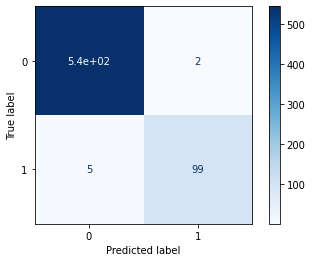

In [ ]:
# Plot confusion matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

plot_confusion_matrix(grid_search_log, X_test_transformed, y_test, cmap=plt.cm.Blues)

###2. KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = [{
    'weights': ['uniform', 'distance'],
    'n_neighbors': [2, 3, 4, 5, 6, 7, 8]
}]
knn_clf = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)
grid_search_knn.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] n_neighbors=2, weights=uniform ..................................
[CV] ...... n_neighbors=2, weights=uniform, score=0.923, total=   0.1s
[CV] n_neighbors=2, weights=uniform ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ...... n_neighbors=2, weights=uniform, score=0.929, total=   0.1s
[CV] n_neighbors=2, weights=uniform ..................................
[CV] ...... n_neighbors=2, weights=uniform, score=0.929, total=   0.1s
[CV] n_neighbors=2, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ...... n_neighbors=2, weights=uniform, score=0.931, total=   0.1s
[CV] n_neighbors=2, weights=uniform ..................................
[CV] ...... n_neighbors=2, weights=uniform, score=0.935, total=   0.1s
[CV] n_neighbors=2, weights=distance .................................
[CV] ..... n_neighbors=2, weights=distance, score=0.937, total=   0.1s
[CV] n_neighbors=2, weights=distance .................................
[CV] ..... n_neighbors=2, weights=distance, score=0.940, total=   0.1s
[CV] n_neighbors=2, weights=distance .................................
[CV] ..... n_neighbors=2, weights=distance, score=0.919, total=   0.1s
[CV] n_neighbors=2, weights=distance .................................
[CV] ..... n_neighbors=2, weights=distance, score=0.940, total=   0.1s
[CV] n_neighbors=2, weights=distance .................................
[CV] ..... n_neighbors=2, weights=distance, score=0.946, total=   0.1s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    7.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': [2, 3, 4, 5, 6, 7, 8],
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
grid_search_knn.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [ ]:
grid_search_knn.best_score_

0.9403846153846154

In [ ]:
y_pred_knn = grid_search_knn.predict(X_test_transformed)
print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_pred_knn)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_pred_knn)))
print("f1 score: {:.2f}%".format(100 * f1_score(y_test, y_pred_knn)))

Precision: 92.59%
Recall: 72.12%
f1 score: 81.08%


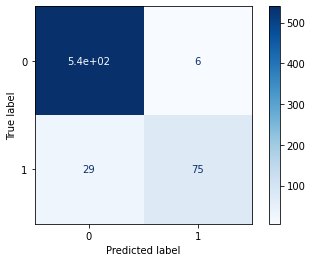

In [ ]:
plot_confusion_matrix(grid_search_knn, X_test_transformed, y_test, cmap=plt.cm.Blues)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor()
grid_search_knn_regressor = GridSearchCV(knn_reg, param_grid, cv=5, verbose=3)
grid_search_knn_regressor.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] n_neighbors=2, weights=uniform ..................................
[CV] ...... n_neighbors=2, weights=uniform, score=0.548, total=   0.1s
[CV] n_neighbors=2, weights=uniform ..................................
[CV] ...... n_neighbors=2, weights=uniform, score=0.571, total=   0.1s
[CV] n_neighbors=2, weights=uniform ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ...... n_neighbors=2, weights=uniform, score=0.434, total=   0.1s
[CV] n_neighbors=2, weights=uniform ..................................
[CV] ...... n_neighbors=2, weights=uniform, score=0.579, total=   0.1s
[CV] n_neighbors=2, weights=uniform ..................................
[CV] ...... n_neighbors=2, weights=uniform, score=0.598, total=   0.1s
[CV] n_neighbors=2, weights=distance .................................
[CV] ..... n_neighbors=2, weights=distance, score=0.578, total=   0.1s
[CV] n_neighbors=2, weights=distance .................................
[CV] ..... n_neighbors=2, weights=distance, score=0.597, total=   0.1s
[CV] n_neighbors=2, weights=distance .................................
[CV] ..... n_neighbors=2, weights=distance, score=0.470, total=   0.1s
[CV] n_neighbors=2, weights=distance .................................
[CV] ..... n_neighbors=2, weights=distance, score=0.600, total=   0.1s
[CV] n_neighbors=2, weights=distance .................................
[CV] .

[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    6.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': [2, 3, 4, 5, 6, 7, 8],
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
grid_search_knn_regressor.best_params_

{'n_neighbors': 6, 'weights': 'distance'}

In [ ]:
grid_search_knn_regressor.best_score_

0.6108842445160895

###3. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_param_grid = [{
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_features': ['auto', 'sqrt', 'log2']
}]

dt_clf = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(dt_clf, param_grid=dt_param_grid, cv=5, verbose=3)
grid_search_dt.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] criterion=gini, max_features=auto, splitter=best ................
[CV]  criterion=gini, max_features=auto, splitter=best, score=0.927, total=   0.0s
[CV] criterion=gini, max_features=auto, splitter=best ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=gini, max_features=auto, splitter=best, score=0.902, total=   0.0s
[CV] criterion=gini, max_features=auto, splitter=best ................
[CV]  criterion=gini, max_features=auto, splitter=best, score=0.908, total=   0.0s
[CV] criterion=gini, max_features=auto, splitter=best ................
[CV]  criterion=gini, max_features=auto, splitter=best, score=0.927, total=   0.0s
[CV] criterion=gini, max_features=auto, splitter=best ................
[CV]  criterion=gini, max_features=auto, splitter=best, score=0.921, total=   0.0s
[CV] criterion=gini, max_features=auto, splitter=random ..............
[CV]  criterion=gini, max_features=auto, splitter=random, score=0.904, total=   0.0s
[CV] criterion=gini, max_features=auto, splitter=random ..............
[CV]  criterion=gini, max_features=auto, splitter=random, score=0.900, total=   0.0s
[CV] criterion=gini, max_features=auto, splitter=random ..............
[CV]  criterion=gini, max_features=auto, splitter=random, score=0.877, t

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                    

In [ ]:
grid_search_dt.best_params_

{'criterion': 'entropy', 'max_features': 'auto', 'splitter': 'best'}

In [ ]:
grid_search_dt.best_score_

0.9311538461538461

In [ ]:
y_pred_dt = grid_search_dt.predict(X_test_transformed)
print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_pred_dt)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_pred_dt)))
print("f1 score: {:.2f}%".format(100 * f1_score(y_test, y_pred_dt)))

Precision: 80.36%
Recall: 86.54%
f1 score: 83.33%


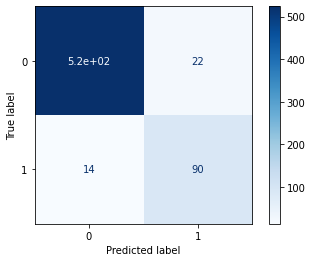

In [ ]:
plot_confusion_matrix(grid_search_dt, X_test_transformed, y_test, cmap=plt.cm.Blues)

###4. Random Forest

In [ ]:
import random
from sklearn.ensemble import RandomForestClassifier

n_estimators = []
for i in range(0, 10):
  n = random.randint(0, 200)
  n_estimators.append(n)

rf_param_grid = [{
    'n_estimators': n_estimators,
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
}]

rf_clf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf_clf, param_grid=rf_param_grid, cv=5, verbose=3)
grid_search_rf.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] bootstrap=True, criterion=gini, max_features=auto, n_estimators=153 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=True, criterion=gini, max_features=auto, n_estimators=153, score=0.979, total=   1.4s
[CV] bootstrap=True, criterion=gini, max_features=auto, n_estimators=153 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV]  bootstrap=True, criterion=gini, max_features=auto, n_estimators=153, score=0.967, total=   1.5s
[CV] bootstrap=True, criterion=gini, max_features=auto, n_estimators=153 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s


[CV]  bootstrap=True, criterion=gini, max_features=auto, n_estimators=153, score=0.977, total=   1.3s
[CV] bootstrap=True, criterion=gini, max_features=auto, n_estimators=153 
[CV]  bootstrap=True, criterion=gini, max_features=auto, n_estimators=153, score=0.977, total=   1.4s
[CV] bootstrap=True, criterion=gini, max_features=auto, n_estimators=153 
[CV]  bootstrap=True, criterion=gini, max_features=auto, n_estimators=153, score=0.975, total=   1.4s
[CV] bootstrap=True, criterion=gini, max_features=auto, n_estimators=139 
[CV]  bootstrap=True, criterion=gini, max_features=auto, n_estimators=139, score=0.973, total=   1.3s
[CV] bootstrap=True, criterion=gini, max_features=auto, n_estimators=139 
[CV]  bootstrap=True, criterion=gini, max_features=auto, n_estimators=139, score=0.967, total=   1.2s
[CV] bootstrap=True, criterion=gini, max_features=auto, n_estimators=139 
[CV]  bootstrap=True, criterion=gini, max_features=auto, n_estimators=139, score=0.975, total=   1.2s
[CV] bootstrap=Tru

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  8.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [ ]:
grid_search_rf.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_features': 'auto',
 'n_estimators': 153}

In [ ]:
grid_search_rf.best_score_

0.975

In [ ]:
y_pred_rf = grid_search_rf.predict(X_test_transformed)
print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_pred_rf)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_pred_rf)))
print("f1 score: {:.2f}%".format(100 * f1_score(y_test, y_pred_rf)))

Precision: 98.97%
Recall: 92.31%
f1 score: 95.52%


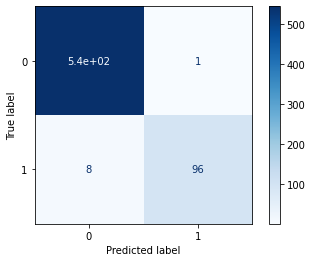

In [ ]:
plot_confusion_matrix(grid_search_rf, X_test_transformed, y_test, cmap=plt.cm.Blues)

###5. Naive Bayes

####1. Gaussian NB


In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb_clf = GaussianNB()
gnb_clf.fit(X_train_transformed.toarray(), y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred_gnb = gnb_clf.predict(X_test_transformed.toarray())
print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_pred_gnb)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_pred_gnb)))
print("f1 score: {:.2f}%".format(100 * f1_score(y_test, y_pred_gnb)))

Precision: 41.08%
Recall: 95.19%
f1 score: 57.39%


In [ ]:
# Hyperparameter tuning
nb_param_grid = [{
    'var_smoothing': [1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]
}]

gnb_clf = GaussianNB()
grid_search_nb = GridSearchCV(gnb_clf, param_grid=nb_param_grid, cv=5, verbose=3)
grid_search_nb.fit(X_train_transformed.toarray(), y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
[CV] var_smoothing=1e-05 .............................................
[CV] ................. var_smoothing=1e-05, score=0.885, total=   0.0s
[CV] var_smoothing=1e-05 .............................................
[CV] ................. var_smoothing=1e-05, score=0.327, total=   0.0s
[CV] var_smoothing=1e-05 .............................................
[CV] ................. var_smoothing=1e-05, score=0.844, total=   0.0s
[CV] var_smoothing=1e-05 .............................................
[CV] ................. var_smoothing=1e-05, score=0.883, total=   0.0s
[CV] var_smoothing=1e-05 .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ................. var_smoothing=1e-05, score=0.588, total=   0.1s
[CV] var_smoothing=1e-06 .............................................
[CV] ................. var_smoothing=1e-06, score=0.667, total=   0.0s
[CV] var_smoothing=1e-06 .............................................
[CV] ................. var_smoothing=1e-06, score=0.510, total=   0.0s
[CV] var_smoothing=1e-06 .............................................
[CV] ................. var_smoothing=1e-06, score=0.904, total=   0.0s
[CV] var_smoothing=1e-06 .............................................
[CV] ................. var_smoothing=1e-06, score=0.819, total=   0.0s
[CV] var_smoothing=1e-06 .............................................
[CV] ................. var_smoothing=1e-06, score=0.596, total=   0.0s
[CV] var_smoothing=1e-07 .............................................
[CV] ................. var_smoothing=1e-07, score=0.712, total=   0.0s
[CV] var_smoothing=1e-07 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    2.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=None,
             param_grid=[{'var_smoothing': [1e-05, 1e-06, 1e-07, 1e-08, 1e-09,
                                            1e-10, 1e-11, 1e-12, 1e-13, 1e-14,
                                            1e-15]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
grid_search_nb.best_params_

{'var_smoothing': 1e-08}

In [ ]:
grid_search_nb.best_score_

0.8038461538461539

In [ ]:
y_pred_gnb = grid_search_nb.predict(X_test_transformed.toarray())
print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_pred_gnb)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_pred_gnb)))
print("f1 score: {:.2f}%".format(100 * f1_score(y_test, y_pred_gnb)))

Precision: 42.13%
Recall: 95.19%
f1 score: 58.41%


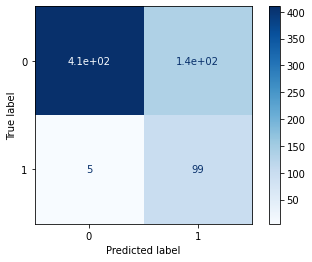

In [ ]:
plot_confusion_matrix(grid_search_nb, X_test_transformed.toarray(), y_test, cmap=plt.cm.Blues)

###2. Multinomial Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB



mnb_param_grid = [{
    'alpha' : np.random.uniform(size=(10,)),
    'fit_prior': [True, False],
}]

mnb_clf = MultinomialNB()
grid_search_mnb = GridSearchCV(mnb_clf, param_grid=mnb_param_grid, cv=5, verbose=3)
grid_search_mnb.fit(X_train_transformed.toarray(), y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] alpha=0.27589515353983063, fit_prior=True .......................
[CV]  alpha=0.27589515353983063, fit_prior=True, score=0.967, total=   0.0s
[CV] alpha=0.27589515353983063, fit_prior=True .......................
[CV]  alpha=0.27589515353983063, fit_prior=True, score=0.965, total=   0.1s
[CV] alpha=0.27589515353983063, fit_prior=True .......................
[CV]  alpha=0.27589515353983063, fit_prior=True, score=0.962, total=   0.0s
[CV] alpha=0.27589515353983063, fit_prior=True .......................
[CV]  alpha=0.27589515353983063, fit_prior=True, score=0.967, total=   0.0s
[CV] alpha=0.27589515353983063, fit_prior=True .......................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  alpha=0.27589515353983063, fit_prior=True, score=0.956, total=   0.0s
[CV] alpha=0.27589515353983063, fit_prior=False ......................
[CV]  alpha=0.27589515353983063, fit_prior=False, score=0.971, total=   0.0s
[CV] alpha=0.27589515353983063, fit_prior=False ......................
[CV]  alpha=0.27589515353983063, fit_prior=False, score=0.967, total=   0.0s
[CV] alpha=0.27589515353983063, fit_prior=False ......................
[CV]  alpha=0.27589515353983063, fit_prior=False, score=0.956, total=   0.0s
[CV] alpha=0.27589515353983063, fit_prior=False ......................
[CV]  alpha=0.27589515353983063, fit_prior=False, score=0.963, total=   0.0s
[CV] alpha=0.27589515353983063, fit_prior=False ......................
[CV]  alpha=0.27589515353983063, fit_prior=False, score=0.960, total=   0.0s
[CV] alpha=0.7130675212983979, fit_prior=True ........................
[CV]  alpha=0.7130675212983979, fit_prior=True, score=0.967, total=   0.0s
[CV] alpha=0.7130675212983979, fit_pri

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': array([0.27589515, 0.71306752, 0.45386414, 0.63800507, 0.9784994 ,
       0.34270655, 0.03435042, 0.07773946, 0.95836914, 0.88949767]),
                          'fit_prior': [True, False]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
grid_search_mnb.best_params_

{'alpha': 0.03435042418656198, 'fit_prior': False}

In [ ]:
grid_search_mnb.best_score_

0.9642307692307692

In [ ]:
y_pred_mnb = grid_search_mnb.predict(X_test_transformed.toarray())
print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_pred_mnb)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_pred_mnb)))
print("f1 score: {:.2f}%".format(100 * f1_score(y_test, y_pred_mnb)))

Precision: 90.10%
Recall: 87.50%
f1 score: 88.78%


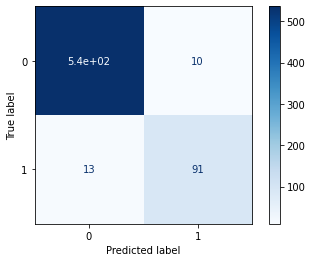

In [ ]:
plot_confusion_matrix(grid_search_mnb, X_test_transformed.toarray(), y_test, cmap=plt.cm.Blues)

####3. Complement Naive Bayes

In [ ]:
from sklearn.naive_bayes import ComplementNB

cnb_param_grid = {
    'alpha' : np.random.uniform(size=(10,)),
    'fit_prior': [True, False],
    'norm': [True, False],
}

cnb_clf = ComplementNB()
grid_search_cnb = GridSearchCV(cnb_clf, cnb_param_grid, cv=5, verbose=3)
grid_search_cnb.fit(X_train_transformed.toarray(), y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] alpha=0.0996628228988693, fit_prior=True, norm=True .............
[CV]  alpha=0.0996628228988693, fit_prior=True, norm=True, score=0.562, total=   0.0s
[CV] alpha=0.0996628228988693, fit_prior=True, norm=True .............
[CV]  alpha=0.0996628228988693, fit_prior=True, norm=True, score=0.621, total=   0.0s
[CV] alpha=0.0996628228988693, fit_prior=True, norm=True .............
[CV]  alpha=0.0996628228988693, fit_prior=True, norm=True, score=0.550, total=   0.1s
[CV] alpha=0.0996628228988693, fit_prior=True, norm=True .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  alpha=0.0996628228988693, fit_prior=True, norm=True, score=0.625, total=   0.1s
[CV] alpha=0.0996628228988693, fit_prior=True, norm=True .............
[CV]  alpha=0.0996628228988693, fit_prior=True, norm=True, score=0.621, total=   0.0s
[CV] alpha=0.0996628228988693, fit_prior=True, norm=False ............
[CV]  alpha=0.0996628228988693, fit_prior=True, norm=False, score=0.971, total=   0.0s
[CV] alpha=0.0996628228988693, fit_prior=True, norm=False ............
[CV]  alpha=0.0996628228988693, fit_prior=True, norm=False, score=0.963, total=   0.0s
[CV] alpha=0.0996628228988693, fit_prior=True, norm=False ............
[CV]  alpha=0.0996628228988693, fit_prior=True, norm=False, score=0.956, total=   0.1s
[CV] alpha=0.0996628228988693, fit_prior=True, norm=False ............
[CV]  alpha=0.0996628228988693, fit_prior=True, norm=False, score=0.965, total=   0.0s
[CV] alpha=0.0996628228988693, fit_prior=True, norm=False ............
[CV]  alpha=0.0996628228988693, fit_prior=True, norm=F

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   10.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=ComplementNB(alpha=1.0, class_prior=None, fit_prior=True,
                                    norm=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([0.09966282, 0.536668  , 0.45088066, 0.82540663, 0.08028171,
       0.74552027, 0.17471182, 0.37793035, 0.82693448, 0.6466229 ]),
                         'fit_prior': [True, False], 'norm': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
grid_search_cnb.best_params_

{'alpha': 0.8254066339240771, 'fit_prior': True, 'norm': False}

In [ ]:
grid_search_cnb.best_score_

0.9638461538461538

In [ ]:
y_pred_cnb = grid_search_cnb.predict(X_test_transformed.toarray())
print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_pred_cnb)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_pred_cnb)))
print("f1 score: {:.2f}%".format(100 * f1_score(y_test, y_pred_cnb)))

Precision: 90.10%
Recall: 87.50%
f1 score: 88.78%


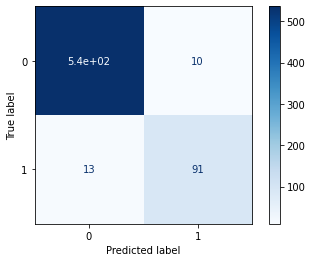

In [ ]:
plot_confusion_matrix(grid_search_cnb, X_test_transformed.toarray(), y_test, cmap=plt.cm.Blues)

####4. Bernoulli Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB

bnb_clf = BernoulliNB()
grid_search_bnb = GridSearchCV(bnb_clf, param_grid=mnb_param_grid, cv=5, verbose=3)
grid_search_bnb.fit(X_train_transformed.toarray(), y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] alpha=0.27589515353983063, fit_prior=True .......................
[CV]  alpha=0.27589515353983063, fit_prior=True, score=0.950, total=   0.1s
[CV] alpha=0.27589515353983063, fit_prior=True .......................
[CV]  alpha=0.27589515353983063, fit_prior=True, score=0.952, total=   0.1s
[CV] alpha=0.27589515353983063, fit_prior=True .......................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  alpha=0.27589515353983063, fit_prior=True, score=0.935, total=   0.1s
[CV] alpha=0.27589515353983063, fit_prior=True .......................
[CV]  alpha=0.27589515353983063, fit_prior=True, score=0.950, total=   0.1s
[CV] alpha=0.27589515353983063, fit_prior=True .......................
[CV]  alpha=0.27589515353983063, fit_prior=True, score=0.954, total=   0.1s
[CV] alpha=0.27589515353983063, fit_prior=False ......................
[CV]  alpha=0.27589515353983063, fit_prior=False, score=0.948, total=   0.1s
[CV] alpha=0.27589515353983063, fit_prior=False ......................
[CV]  alpha=0.27589515353983063, fit_prior=False, score=0.952, total=   0.1s
[CV] alpha=0.27589515353983063, fit_prior=False ......................
[CV]  alpha=0.27589515353983063, fit_prior=False, score=0.933, total=   0.1s
[CV] alpha=0.27589515353983063, fit_prior=False ......................
[CV]  alpha=0.27589515353983063, fit_prior=False, score=0.950, total=   0.1s
[CV] alpha=0.27589515353983063, fit_pr

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None,
                                   fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': array([0.27589515, 0.71306752, 0.45386414, 0.63800507, 0.9784994 ,
       0.34270655, 0.03435042, 0.07773946, 0.95836914, 0.88949767]),
                          'fit_prior': [True, False]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
grid_search_bnb.best_params_

{'alpha': 0.03435042418656198, 'fit_prior': True}

In [ ]:
grid_search_bnb.best_score_

0.9519230769230769

In [ ]:
y_pred_bnb = grid_search_bnb.predict(X_test_transformed.toarray())
print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_pred_bnb)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_pred_bnb)))
print("f1 score: {:.2f}%".format(100 * f1_score(y_test, y_pred_bnb)))

Precision: 90.53%
Recall: 82.69%
f1 score: 86.43%


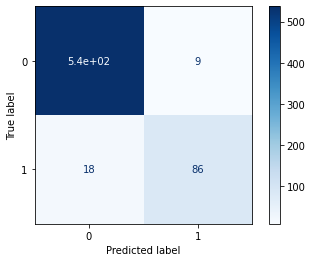

In [ ]:
plot_confusion_matrix(grid_search_bnb, X_test_transformed.toarray(), y_test, cmap=plt.cm.Blues)

###6. SVM

In [ ]:
from sklearn.svm import SVC

svc_param_grid = [{
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'shrinking': [True, False],
    'tol': [1e-1, 1e-2, 1e-3, 1e-4, 1e-5],
    'probability': [True, False]
}]

svc = SVC(random_state=42)
grid_search_svc = GridSearchCV(svc, param_grid=svc_param_grid, cv=5, verbose=3)
grid_search_svc.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV] gamma=scale, kernel=linear, probability=True, shrinking=True, tol=0.1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  gamma=scale, kernel=linear, probability=True, shrinking=True, tol=0.1, score=0.983, total=   2.8s
[CV] gamma=scale, kernel=linear, probability=True, shrinking=True, tol=0.1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


[CV]  gamma=scale, kernel=linear, probability=True, shrinking=True, tol=0.1, score=0.967, total=   2.6s
[CV] gamma=scale, kernel=linear, probability=True, shrinking=True, tol=0.1 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.4s remaining:    0.0s


[CV]  gamma=scale, kernel=linear, probability=True, shrinking=True, tol=0.1, score=0.954, total=   2.5s
[CV] gamma=scale, kernel=linear, probability=True, shrinking=True, tol=0.1 
[CV]  gamma=scale, kernel=linear, probability=True, shrinking=True, tol=0.1, score=0.979, total=   2.7s
[CV] gamma=scale, kernel=linear, probability=True, shrinking=True, tol=0.1 
[CV]  gamma=scale, kernel=linear, probability=True, shrinking=True, tol=0.1, score=0.969, total=   2.5s
[CV] gamma=scale, kernel=linear, probability=True, shrinking=True, tol=0.01 
[CV]  gamma=scale, kernel=linear, probability=True, shrinking=True, tol=0.01, score=0.981, total=   2.7s
[CV] gamma=scale, kernel=linear, probability=True, shrinking=True, tol=0.01 
[CV]  gamma=scale, kernel=linear, probability=True, shrinking=True, tol=0.01, score=0.967, total=   2.7s
[CV] gamma=scale, kernel=linear, probability=True, shrinking=True, tol=0.01 
[CV]  gamma=scale, kernel=linear, probability=True, shrinking=True, tol=0.01, score=0.954, tota

[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed: 45.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=42, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'gamma': ['scale', 'auto'],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                          'probability': [True, False],
                          'shrinking': [True, False],
                          'tol': [0.1, 0.01, 0.001, 0.0001, 1e-05]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
grid_search_svc.best_params_

{'gamma': 'scale',
 'kernel': 'linear',
 'probability': True,
 'shrinking': True,
 'tol': 0.1}

In [ ]:
grid_search_svc.best_score_

0.9703846153846154

In [ ]:
y_pred_svc = grid_search_svc.predict(X_test_transformed.toarray())
print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_pred_svc)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_pred_svc)))
print("f1 score: {:.2f}%".format(100 * f1_score(y_test, y_pred_svc)))

Precision: 88.89%
Recall: 92.31%
f1 score: 90.57%


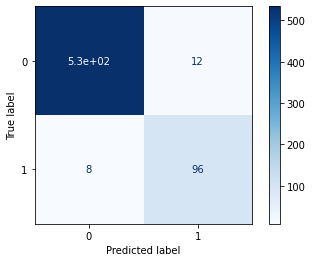

In [ ]:
plot_confusion_matrix(grid_search_svc, X_test_transformed, y_test, cmap=plt.cm.Blues)

###7. Ensemble Methods<br>
####1. Boosting
Here we use the weakest model (Gaussian Naive Bayes) since stronger models will overfit

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adb_param_grid = [{
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'learning_rate': [0.0001, 0.05, 0.5, 1., 1.5, 2.],
    'algorithm': ['SAMME', 'SAMME.R']
}]

gnb_v2 = GaussianNB()
adaboost = AdaBoostClassifier(gnb_v2)
grid_search_adb = GridSearchCV(adaboost, adb_param_grid, cv=5, verbose=3)
grid_search_adb.fit(X_train_transformed.toarray(), y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] algorithm=SAMME, learning_rate=0.0001, n_estimators=50 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  algorithm=SAMME, learning_rate=0.0001, n_estimators=50, score=0.744, total=   3.7s
[CV] algorithm=SAMME, learning_rate=0.0001, n_estimators=50 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s


[CV]  algorithm=SAMME, learning_rate=0.0001, n_estimators=50, score=0.779, total=   3.7s
[CV] algorithm=SAMME, learning_rate=0.0001, n_estimators=50 ..........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.4s remaining:    0.0s


[CV]  algorithm=SAMME, learning_rate=0.0001, n_estimators=50, score=0.867, total=   3.7s
[CV] algorithm=SAMME, learning_rate=0.0001, n_estimators=50 ..........
[CV]  algorithm=SAMME, learning_rate=0.0001, n_estimators=50, score=0.787, total=   3.7s
[CV] algorithm=SAMME, learning_rate=0.0001, n_estimators=50 ..........
[CV]  algorithm=SAMME, learning_rate=0.0001, n_estimators=50, score=0.825, total=   3.7s
[CV] algorithm=SAMME, learning_rate=0.0001, n_estimators=100 .........
[CV]  algorithm=SAMME, learning_rate=0.0001, n_estimators=100, score=0.744, total=   7.4s
[CV] algorithm=SAMME, learning_rate=0.0001, n_estimators=100 .........
[CV]  algorithm=SAMME, learning_rate=0.0001, n_estimators=100, score=0.779, total=   7.3s
[CV] algorithm=SAMME, learning_rate=0.0001, n_estimators=100 .........
[CV]  algorithm=SAMME, learning_rate=0.0001, n_estimators=100, score=0.867, total=   7.3s
[CV] algorithm=SAMME, learning_rate=0.0001, n_estimators=100 .........
[CV]  algorithm=SAMME, learning_rate=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ZeroDivisionError: Weights sum to zero, can't be normalized

  FitFailedWarning)


[CV]  algorithm=SAMME.R, learning_rate=1.0, n_estimators=250, score=nan, total=  14.7s
[CV] algorithm=SAMME.R, learning_rate=1.0, n_estimators=300 ..........
[CV]  algorithm=SAMME.R, learning_rate=1.0, n_estimators=300, score=0.958, total=  21.5s
[CV] algorithm=SAMME.R, learning_rate=1.0, n_estimators=300 ..........
[CV]  algorithm=SAMME.R, learning_rate=1.0, n_estimators=300, score=0.912, total=  21.4s
[CV] algorithm=SAMME.R, learning_rate=1.0, n_estimators=300 ..........
[CV]  algorithm=SAMME.R, learning_rate=1.0, n_estimators=300, score=0.898, total=  21.7s
[CV] algorithm=SAMME.R, learning_rate=1.0, n_estimators=300 ..........
[CV]  algorithm=SAMME.R, learning_rate=1.0, n_estimators=300, score=0.946, total=  21.9s
[CV] algorithm=SAMME.R, learning_rate=1.0, n_estimators=300 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ZeroDivisionError: Weights sum to zero, can't be normalized

  FitFailedWarning)


[CV]  algorithm=SAMME.R, learning_rate=1.0, n_estimators=300, score=nan, total=  14.7s
[CV] algorithm=SAMME.R, learning_rate=1.5, n_estimators=50 ...........
[CV]  algorithm=SAMME.R, learning_rate=1.5, n_estimators=50, score=0.846, total=   3.6s
[CV] algorithm=SAMME.R, learning_rate=1.5, n_estimators=50 ...........
[CV]  algorithm=SAMME.R, learning_rate=1.5, n_estimators=50, score=0.863, total=   3.7s
[CV] algorithm=SAMME.R, learning_rate=1.5, n_estimators=50 ...........
[CV]  algorithm=SAMME.R, learning_rate=1.5, n_estimators=50, score=0.848, total=   3.7s
[CV] algorithm=SAMME.R, learning_rate=1.5, n_estimators=50 ...........
[CV]  algorithm=SAMME.R, learning_rate=1.5, n_estimators=50, score=0.912, total=   3.6s
[CV] algorithm=SAMME.R, learning_rate=1.5, n_estimators=50 ...........
[CV]  algorithm=SAMME.R, learning_rate=1.5, n_estimators=50, score=0.848, total=   3.6s
[CV] algorithm=SAMME.R, learning_rate=1.5, n_estimators=100 ..........
[CV]  algorithm=SAMME.R, learning_rate=1.5, n_e

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ZeroDivisionError: Weights sum to zero, can't be normalized

  FitFailedWarning)


[CV]  algorithm=SAMME.R, learning_rate=1.5, n_estimators=100, score=nan, total=   3.6s
[CV] algorithm=SAMME.R, learning_rate=1.5, n_estimators=100 ..........
[CV]  algorithm=SAMME.R, learning_rate=1.5, n_estimators=100, score=0.912, total=   7.2s
[CV] algorithm=SAMME.R, learning_rate=1.5, n_estimators=100 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ZeroDivisionError: Weights sum to zero, can't be normalized

  FitFailedWarning)


[CV]  algorithm=SAMME.R, learning_rate=1.5, n_estimators=100, score=nan, total=   5.3s
[CV] algorithm=SAMME.R, learning_rate=1.5, n_estimators=150 ..........
[CV]  algorithm=SAMME.R, learning_rate=1.5, n_estimators=150, score=0.954, total=  11.0s
[CV] algorithm=SAMME.R, learning_rate=1.5, n_estimators=150 ..........
[CV]  algorithm=SAMME.R, learning_rate=1.5, n_estimators=150, score=0.954, total=  10.9s
[CV] algorithm=SAMME.R, learning_rate=1.5, n_estimators=150 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ZeroDivisionError: Weights sum to zero, can't be normalized

  FitFailedWarning)


[CV]  algorithm=SAMME.R, learning_rate=1.5, n_estimators=150, score=nan, total=   3.6s
[CV] algorithm=SAMME.R, learning_rate=1.5, n_estimators=150 ..........
[CV]  algorithm=SAMME.R, learning_rate=1.5, n_estimators=150, score=0.912, total=  10.8s
[CV] algorithm=SAMME.R, learning_rate=1.5, n_estimators=150 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ZeroDivisionError: Weights sum to zero, can't be normalized

  FitFailedWarning)


[CV]  algorithm=SAMME.R, learning_rate=1.5, n_estimators=150, score=nan, total=   5.4s
[CV] algorithm=SAMME.R, learning_rate=1.5, n_estimators=200 ..........
[CV]  algorithm=SAMME.R, learning_rate=1.5, n_estimators=200, score=0.942, total=  14.6s
[CV] algorithm=SAMME.R, learning_rate=1.5, n_estimators=200 ..........
[CV]  algorithm=SAMME.R, learning_rate=1.5, n_estimators=200, score=0.960, total=  14.4s
[CV] algorithm=SAMME.R, learning_rate=1.5, n_estimators=200 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ZeroDivisionError: Weights sum to zero, can't be normalized

  FitFailedWarning)


[CV]  algorithm=SAMME.R, learning_rate=1.5, n_estimators=200, score=nan, total=   3.6s
[CV] algorithm=SAMME.R, learning_rate=1.5, n_estimators=200 ..........
[CV]  algorithm=SAMME.R, learning_rate=1.5, n_estimators=200, score=0.912, total=  14.4s
[CV] algorithm=SAMME.R, learning_rate=1.5, n_estimators=200 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ZeroDivisionError: Weights sum to zero, can't be normalized

  FitFailedWarning)


[CV]  algorithm=SAMME.R, learning_rate=1.5, n_estimators=200, score=nan, total=   5.3s
[CV] algorithm=SAMME.R, learning_rate=1.5, n_estimators=250 ..........
[CV]  algorithm=SAMME.R, learning_rate=1.5, n_estimators=250, score=0.965, total=  18.2s
[CV] algorithm=SAMME.R, learning_rate=1.5, n_estimators=250 ..........
[CV]  algorithm=SAMME.R, learning_rate=1.5, n_estimators=250, score=0.960, total=  18.0s
[CV] algorithm=SAMME.R, learning_rate=1.5, n_estimators=250 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ZeroDivisionError: Weights sum to zero, can't be normalized

  FitFailedWarning)


[CV]  algorithm=SAMME.R, learning_rate=1.5, n_estimators=250, score=nan, total=   3.6s
[CV] algorithm=SAMME.R, learning_rate=1.5, n_estimators=250 ..........
[CV]  algorithm=SAMME.R, learning_rate=1.5, n_estimators=250, score=0.912, total=  17.8s
[CV] algorithm=SAMME.R, learning_rate=1.5, n_estimators=250 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ZeroDivisionError: Weights sum to zero, can't be normalized

  FitFailedWarning)


[CV]  algorithm=SAMME.R, learning_rate=1.5, n_estimators=250, score=nan, total=   5.3s
[CV] algorithm=SAMME.R, learning_rate=1.5, n_estimators=300 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ZeroDivisionError: Weights sum to zero, can't be normalized

  FitFailedWarning)


[CV]  algorithm=SAMME.R, learning_rate=1.5, n_estimators=300, score=nan, total=  18.8s
[CV] algorithm=SAMME.R, learning_rate=1.5, n_estimators=300 ..........
[CV]  algorithm=SAMME.R, learning_rate=1.5, n_estimators=300, score=0.960, total=  21.5s
[CV] algorithm=SAMME.R, learning_rate=1.5, n_estimators=300 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ZeroDivisionError: Weights sum to zero, can't be normalized

  FitFailedWarning)


[CV]  algorithm=SAMME.R, learning_rate=1.5, n_estimators=300, score=nan, total=   3.6s
[CV] algorithm=SAMME.R, learning_rate=1.5, n_estimators=300 ..........
[CV]  algorithm=SAMME.R, learning_rate=1.5, n_estimators=300, score=0.912, total=  21.3s
[CV] algorithm=SAMME.R, learning_rate=1.5, n_estimators=300 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ZeroDivisionError: Weights sum to zero, can't be normalized

  FitFailedWarning)


[CV]  algorithm=SAMME.R, learning_rate=1.5, n_estimators=300, score=nan, total=   5.3s
[CV] algorithm=SAMME.R, learning_rate=2.0, n_estimators=50 ...........
[CV]  algorithm=SAMME.R, learning_rate=2.0, n_estimators=50, score=0.413, total=   3.6s
[CV] algorithm=SAMME.R, learning_rate=2.0, n_estimators=50 ...........
[CV]  algorithm=SAMME.R, learning_rate=2.0, n_estimators=50, score=0.912, total=   3.6s
[CV] algorithm=SAMME.R, learning_rate=2.0, n_estimators=50 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ZeroDivisionError: Weights sum to zero, can't be normalized

  FitFailedWarning)


[CV]  algorithm=SAMME.R, learning_rate=2.0, n_estimators=50, score=nan, total=   2.5s
[CV] algorithm=SAMME.R, learning_rate=2.0, n_estimators=50 ...........
[CV]  algorithm=SAMME.R, learning_rate=2.0, n_estimators=50, score=0.842, total=   3.6s
[CV] algorithm=SAMME.R, learning_rate=2.0, n_estimators=50 ...........
[CV]  algorithm=SAMME.R, learning_rate=2.0, n_estimators=50, score=0.856, total=   3.7s
[CV] algorithm=SAMME.R, learning_rate=2.0, n_estimators=100 ..........
[CV]  algorithm=SAMME.R, learning_rate=2.0, n_estimators=100, score=0.413, total=   7.2s
[CV] algorithm=SAMME.R, learning_rate=2.0, n_estimators=100 ..........
[CV]  algorithm=SAMME.R, learning_rate=2.0, n_estimators=100, score=0.910, total=   7.2s
[CV] algorithm=SAMME.R, learning_rate=2.0, n_estimators=100 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ZeroDivisionError: Weights sum to zero, can't be normalized

  FitFailedWarning)


[CV]  algorithm=SAMME.R, learning_rate=2.0, n_estimators=100, score=nan, total=   2.5s
[CV] algorithm=SAMME.R, learning_rate=2.0, n_estimators=100 ..........
[CV]  algorithm=SAMME.R, learning_rate=2.0, n_estimators=100, score=0.671, total=   7.1s
[CV] algorithm=SAMME.R, learning_rate=2.0, n_estimators=100 ..........
[CV]  algorithm=SAMME.R, learning_rate=2.0, n_estimators=100, score=0.906, total=   7.2s
[CV] algorithm=SAMME.R, learning_rate=2.0, n_estimators=150 ..........
[CV]  algorithm=SAMME.R, learning_rate=2.0, n_estimators=150, score=0.413, total=  10.7s
[CV] algorithm=SAMME.R, learning_rate=2.0, n_estimators=150 ..........
[CV]  algorithm=SAMME.R, learning_rate=2.0, n_estimators=150, score=0.910, total=  10.7s
[CV] algorithm=SAMME.R, learning_rate=2.0, n_estimators=150 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ZeroDivisionError: Weights sum to zero, can't be normalized

  FitFailedWarning)


[CV]  algorithm=SAMME.R, learning_rate=2.0, n_estimators=150, score=nan, total=   2.5s
[CV] algorithm=SAMME.R, learning_rate=2.0, n_estimators=150 ..........
[CV]  algorithm=SAMME.R, learning_rate=2.0, n_estimators=150, score=0.671, total=  10.8s
[CV] algorithm=SAMME.R, learning_rate=2.0, n_estimators=150 ..........
[CV]  algorithm=SAMME.R, learning_rate=2.0, n_estimators=150, score=0.904, total=  10.8s
[CV] algorithm=SAMME.R, learning_rate=2.0, n_estimators=200 ..........
[CV]  algorithm=SAMME.R, learning_rate=2.0, n_estimators=200, score=0.413, total=  14.3s
[CV] algorithm=SAMME.R, learning_rate=2.0, n_estimators=200 ..........
[CV]  algorithm=SAMME.R, learning_rate=2.0, n_estimators=200, score=0.910, total=  14.1s
[CV] algorithm=SAMME.R, learning_rate=2.0, n_estimators=200 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ZeroDivisionError: Weights sum to zero, can't be normalized

  FitFailedWarning)


[CV]  algorithm=SAMME.R, learning_rate=2.0, n_estimators=200, score=nan, total=   2.5s
[CV] algorithm=SAMME.R, learning_rate=2.0, n_estimators=200 ..........
[CV]  algorithm=SAMME.R, learning_rate=2.0, n_estimators=200, score=0.671, total=  14.3s
[CV] algorithm=SAMME.R, learning_rate=2.0, n_estimators=200 ..........
[CV]  algorithm=SAMME.R, learning_rate=2.0, n_estimators=200, score=0.946, total=  14.4s
[CV] algorithm=SAMME.R, learning_rate=2.0, n_estimators=250 ..........
[CV]  algorithm=SAMME.R, learning_rate=2.0, n_estimators=250, score=0.413, total=  18.1s
[CV] algorithm=SAMME.R, learning_rate=2.0, n_estimators=250 ..........
[CV]  algorithm=SAMME.R, learning_rate=2.0, n_estimators=250, score=0.910, total=  18.2s
[CV] algorithm=SAMME.R, learning_rate=2.0, n_estimators=250 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ZeroDivisionError: Weights sum to zero, can't be normalized

  FitFailedWarning)


[CV]  algorithm=SAMME.R, learning_rate=2.0, n_estimators=250, score=nan, total=   2.6s
[CV] algorithm=SAMME.R, learning_rate=2.0, n_estimators=250 ..........
[CV]  algorithm=SAMME.R, learning_rate=2.0, n_estimators=250, score=0.671, total=  18.2s
[CV] algorithm=SAMME.R, learning_rate=2.0, n_estimators=250 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ZeroDivisionError: Weights sum to zero, can't be normalized

  FitFailedWarning)


[CV]  algorithm=SAMME.R, learning_rate=2.0, n_estimators=250, score=nan, total=  14.6s
[CV] algorithm=SAMME.R, learning_rate=2.0, n_estimators=300 ..........
[CV]  algorithm=SAMME.R, learning_rate=2.0, n_estimators=300, score=0.413, total=  21.6s
[CV] algorithm=SAMME.R, learning_rate=2.0, n_estimators=300 ..........
[CV]  algorithm=SAMME.R, learning_rate=2.0, n_estimators=300, score=0.910, total=  21.2s
[CV] algorithm=SAMME.R, learning_rate=2.0, n_estimators=300 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ZeroDivisionError: Weights sum to zero, can't be normalized

  FitFailedWarning)


[CV]  algorithm=SAMME.R, learning_rate=2.0, n_estimators=300, score=nan, total=   2.5s
[CV] algorithm=SAMME.R, learning_rate=2.0, n_estimators=300 ..........
[CV]  algorithm=SAMME.R, learning_rate=2.0, n_estimators=300, score=0.671, total=  21.7s
[CV] algorithm=SAMME.R, learning_rate=2.0, n_estimators=300 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ZeroDivisionError: Weights sum to zero, can't be normalized

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed: 54.4min finished


[CV]  algorithm=SAMME.R, learning_rate=2.0, n_estimators=300, score=nan, total=  14.6s


GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=GaussianNB(priors=None,
                                                                    var_smoothing=1e-09),
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid=[{'algorithm': ['SAMME', 'SAMME.R'],
                          'learning_rate': [0.0001, 0.05, 0.5, 1.0, 1.5, 2.0],
                          'n_estimators': [50, 100, 150, 200, 250, 300]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
grid_search_adb.best_params_

{'algorithm': 'SAMME', 'learning_rate': 1.5, 'n_estimators': 50}

In [ ]:
grid_search_adb.best_score_

0.9550000000000001

In [ ]:
y_pred_adb = grid_search_adb.predict(X_test_transformed.toarray())
print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_pred_adb)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_pred_adb)))
print("f1 score: {:.2f}%".format(100 * f1_score(y_test, y_pred_adb)))

Precision: 87.16%
Recall: 91.35%
f1 score: 89.20%


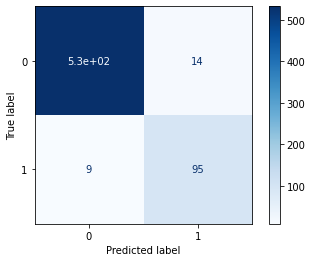

In [132]:
plot_confusion_matrix(grid_search_adb, X_test_transformed.toarray(), y_test, cmap=plt.cm.Blues)

####2. Majority Voting

In [ ]:
# We use our best models: Logistic Regression, Random Forests(rf), SVC, Complement Naive Bayes(cnb)
# There's a small error here with the Logistic Regressor.
from sklearn.ensemble import VotingClassifier

vclf_param_grid = [{
    'voting': ['hard', 'soft'],
}]

cnb_voter = ComplementNB(**grid_search_cnb.best_params_)
log_voter = LogisticRegression(**grid_search_log.best_params_)
rf_voter = RandomForestClassifier(**grid_search_rf.best_params_)
svc_voter = SVC(**grid_search_svc.best_params_)
vot_clf = VotingClassifier(estimators=[('rf', rf_voter), ('svc', svc_voter), ('cnb', cnb_voter), ('logi', log_voter)])
grid_search_vot = GridSearchCV(vot_clf, vclf_param_grid, cv=5, verbose=3)
grid_search_vot.fit(X_train_transformed.toarray(), y_train)  # toarray because of the naive bayes algorithm

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] voting=hard .....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ......................... voting=hard, score=0.985, total=   7.8s
[CV] voting=hard .....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.9s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ......................... voting=hard, score=0.969, total=   8.0s
[CV] voting=hard .....................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   15.8s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ......................... voting=hard, score=0.983, total=   7.8s
[CV] voting=hard .....................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ......................... voting=hard, score=0.981, total=   8.1s
[CV] voting=hard .....................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ......................... voting=hard, score=0.971, total=   7.9s
[CV] voting=soft .....................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ......................... voting=soft, score=0.988, total=   7.9s
[CV] voting=soft .....................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ......................... voting=soft, score=0.979, total=   8.0s
[CV] voting=soft .....................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ......................... voting=soft, score=0.981, total=   7.6s
[CV] voting=soft .....................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ......................... voting=soft, score=0.979, total=   8.2s
[CV] voting=soft .....................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ......................... voting=soft, score=0.969, total=   7.7s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.3min finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=5, error_score=nan,
             estimator=VotingClassifier(estimators=[('rf',
                                                     RandomForestClassifier(bootstrap=True,
                                                                            ccp_alpha=0.0,
                                                                            class_weight=None,
                                                                            criterion='gini',
                                                                            max_depth=None,
                                                                            max_features='auto',
                                                                            max_leaf_nodes=None,
                                                                            max_samples=None,
                                                                            min_impurity_decrease=0.0,
                                                  

In [ ]:
grid_search_vot.best_estimator_

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
        

In [ ]:
grid_search_vot.best_params_

{'voting': 'soft'}

In [ ]:
grid_search_vot.best_score_

0.9792307692307693

In [ ]:
y_pred_vot = grid_search_vot.predict(X_test_transformed.toarray())
print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_pred_vot)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_pred_vot)))
print("f1 score: {:.2f}%".format(100 * f1_score(y_test, y_pred_vot)))

Precision: 98.02%
Recall: 95.19%
f1 score: 96.59%


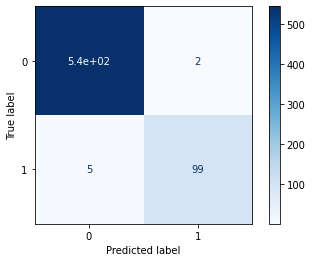

In [131]:
plot_confusion_matrix(grid_search_vot, X_test_transformed.toarray(), y_test, cmap=plt.cm.Blues)

####3. Bootstrap Aggregation/Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

bag_param_grid = [{
    'base_estimator': [cnb_voter, log_voter, rf_voter, svc_voter],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
}]

bag_clf = BaggingClassifier(random_state=42)
grid_search_bag = GridSearchCV(bag_clf, bag_param_grid, cv=5, verbose=3)
grid_search_bag.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] base_estimator=ComplementNB(alpha=0.8254066339240771, class_prior=None, fit_prior=True,
             norm=False), bootstrap=True, bootstrap_features=True 
[CV]  base_estimator=ComplementNB(alpha=0.8254066339240771, class_prior=None, fit_prior=True,
             norm=False), bootstrap=True, bootstrap_features=True, score=0.971, total=   0.1s
[CV] base_estimator=ComplementNB(alpha=0.8254066339240771, class_prior=None, fit_prior=True,
             norm=False), bootstrap=True, bootstrap_features=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  base_estimator=ComplementNB(alpha=0.8254066339240771, class_prior=None, fit_prior=True,
             norm=False), bootstrap=True, bootstrap_features=True, score=0.962, total=   0.1s
[CV] base_estimator=ComplementNB(alpha=0.8254066339240771, class_prior=None, fit_prior=True,
             norm=False), bootstrap=True, bootstrap_features=True 
[CV]  base_estimator=ComplementNB(alpha=0.8254066339240771, class_prior=None, fit_prior=True,
             norm=False), bootstrap=True, bootstrap_features=True, score=0.962, total=   0.1s
[CV] base_estimator=ComplementNB(alpha=0.8254066339240771, class_prior=None, fit_prior=True,
             norm=False), bootstrap=True, bootstrap_features=True 
[CV]  base_estimator=ComplementNB(alpha=0.8254066339240771, class_prior=None, fit_prior=True,
             norm=False), bootstrap=True, bootstrap_features=True, score=0.965, total=   0.1s
[CV] base_estimator=ComplementNB(alpha=0.8254066339240771, class_prior=None, fit_prior=True,
             norm=False

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  base_estimator=ComplementNB(alpha=0.8254066339240771, class_prior=None, fit_prior=True,
             norm=False), bootstrap=True, bootstrap_features=True, score=0.963, total=   0.1s
[CV] base_estimator=ComplementNB(alpha=0.8254066339240771, class_prior=None, fit_prior=True,
             norm=False), bootstrap=True, bootstrap_features=False 
[CV]  base_estimator=ComplementNB(alpha=0.8254066339240771, class_prior=None, fit_prior=True,
             norm=False), bootstrap=True, bootstrap_features=False, score=0.965, total=   0.1s
[CV] base_estimator=ComplementNB(alpha=0.8254066339240771, class_prior=None, fit_prior=True,
             norm=False), bootstrap=True, bootstrap_features=False 
[CV]  base_estimator=ComplementNB(alpha=0.8254066339240771, class_prior=None, fit_prior=True,
             norm=False), bootstrap=True, bootstrap_features=False, score=0.967, total=   0.1s
[CV] base_estimator=ComplementNB(alpha=0.8254066339240771, class_prior=None, fit_prior=True,
             norm=F

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV]  base_estimator=LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), bootstrap=True, bootstrap_features=True, score=0.985, total=   1.9s
[CV] base_estimator=LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), bootstrap=True, bootstrap_features=True 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV]  base_estimator=LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), bootstrap=True, bootstrap_features=True, score=0.971, total=   1.7s
[CV] base_estimator=LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), bootstrap=True, bootstrap_features=True 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV]  base_estimator=LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), bootstrap=True, bootstrap_features=True, score=0.973, total=   1.9s
[CV] base_estimator=LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), bootstrap=True, bootstrap_features=True 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV]  base_estimator=LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), bootstrap=True, bootstrap_features=True, score=0.977, total=   1.8s
[CV] base_estimator=LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), bootstrap=True, bootstrap_features=True 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV]  base_estimator=LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), bootstrap=True, bootstrap_features=True, score=0.973, total=   1.9s
[CV] base_estimator=LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), bootstrap=True, bootstrap_features=False 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV]  base_estimator=LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), bootstrap=True, bootstrap_features=False, score=0.987, total=   1.9s
[CV] base_estimator=LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), bootstrap=True, bootstrap_features=False 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV]  base_estimator=LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), bootstrap=True, bootstrap_features=False, score=0.971, total=   1.7s
[CV] base_estimator=LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), bootstrap=True, bootstrap_features=False 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV]  base_estimator=LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), bootstrap=True, bootstrap_features=False, score=0.977, total=   1.9s
[CV] base_estimator=LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), bootstrap=True, bootstrap_features=False 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV]  base_estimator=LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), bootstrap=True, bootstrap_features=False, score=0.981, total=   1.8s
[CV] base_estimator=LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), bootstrap=True, bootstrap_features=False 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV]  base_estimator=LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), bootstrap=True, bootstrap_features=False, score=0.973, total=   1.9s
[CV] base_estimator=LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), bootstrap=False, bootstrap_features=True 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV]  base_estimator=LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), bootstrap=False, bootstrap_features=True, score=0.987, total=   1.9s
[CV] base_estimator=LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), bootstrap=False, bootstrap_features=True 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV]  base_estimator=LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), bootstrap=False, bootstrap_features=True, score=0.969, total=   1.8s
[CV] base_estimator=LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), bootstrap=False, bootstrap_features=True 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV]  base_estimator=LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), bootstrap=False, bootstrap_features=True, score=0.975, total=   1.9s
[CV] base_estimator=LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), bootstrap=False, bootstrap_features=True 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV]  base_estimator=LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), bootstrap=False, bootstrap_features=True, score=0.979, total=   1.8s
[CV] base_estimator=LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), bootstrap=False, bootstrap_features=True 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV]  base_estimator=LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), bootstrap=False, bootstrap_features=True, score=0.971, total=   1.9s
[CV] base_estimator=LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), bootstrap=False, bootstrap_features=False 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV]  base_estimator=LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), bootstrap=False, bootstrap_features=False, score=0.983, total=   1.8s
[CV] base_estimator=LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), bootstrap=False, bootstrap_features=False 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV]  base_estimator=LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), bootstrap=False, bootstrap_features=False, score=0.973, total=   1.7s
[CV] base_estimator=LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), bootstrap=False, bootstrap_features=False 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV]  base_estimator=LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), bootstrap=False, bootstrap_features=False, score=0.975, total=   2.0s
[CV] base_estimator=LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), bootstrap=False, bootstrap_features=False 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV]  base_estimator=LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), bootstrap=False, bootstrap_features=False, score=0.983, total=   1.7s
[CV] base_estimator=LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), bootstrap=False, bootstrap_features=False 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV]  base_estimator=LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), bootstrap=False, bootstrap_features=False, score=0.967, total=   1.9s
[CV] base_estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=153,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False),

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 11.6min finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

GridSearchCV(cv=5, error_score=nan,
             estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
                                         bootstrap_features=False,
                                         max_features=1.0, max_samples=1.0,
                                         n_estimators=10, n_jobs=None,
                                         oob_score=False, random_state=42,
                                         verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'base_estimator': [ComplementNB(alpha=0.8254066339240771,
                                                          class_pri...
                                             SVC(C=1.0, break_ties=False,
                                                 cache_size=200,
                                                 class_weight=None, coef0=0.0,
                                                 decision_function_shape='ovr',
                             

In [ ]:
grid_search_bag.best_estimator_

BaggingClassifier(base_estimator=LogisticRegression(C=0.615848211066026,
                                                    class_weight=None,
                                                    dual=False,
                                                    fit_intercept=False,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='auto',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='lbfgs', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=10,

In [ ]:
grid_search_bag.best_params_

{'base_estimator': LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                    fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                    max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 'bootstrap': True,
 'bootstrap_features': False}

In [ ]:
grid_search_bag.best_score_

0.9776923076923077

In [ ]:
y_pred_bag = grid_search_bag.predict(X_test_transformed.toarray())
print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_pred_bag)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_pred_bag)))
print("f1 score: {:.2f}%".format(100 * f1_score(y_test, y_pred_bag)))

Precision: 97.03%
Recall: 94.23%
f1 score: 95.61%


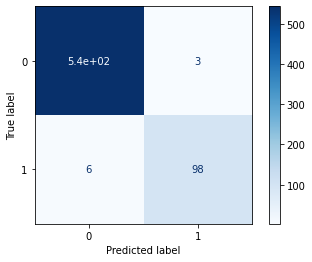

In [130]:
plot_confusion_matrix(grid_search_bag, X_test_transformed.toarray(), y_test, cmap=plt.cm.Blues)